In [1]:
from google.colab import drive
drive.mount('/content/drive')


MessageError: Error: credential propagation was unsuccessful

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Directory containing all CSV files
directory = '/content/drive/MyDrive/CANCER_CSV'


# Dictionary to store DataFrames for each person
cancer_data_dict = {}

# Iterate over each CSV file in the directory
index=1
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)


        # Read CSV file into a DataFrame
        df = pd.read_csv(file_path,skiprows=1, header=None, names=['ID_REF', 'VALUE', 'ABS_CALL', 'DETECTION P-VALUE'])

        # Add DataFrame to dictionary with person ID as key
        cancer_data_dict[index] = df
        index+=1

# Access data for a specific person (for example, person with ID '100'):


# Display data for person 100
print(cancer_data_dict[1])







                       ID_REF    VALUE ABS_CALL  DETECTION P-VALUE
0                   1007_s_at   2057.5        P           0.000805
1                     1053_at    367.2        P           0.048995
2                      117_at    125.1        A           0.418056
3                      121_at   1623.8        P           0.007543
4                   1255_g_at    151.3        A           0.138765
...                       ...      ...      ...                ...
22278  AFFX-r2-Hs28SrRNA-3_at     16.0        A           0.962402
22279  AFFX-r2-Hs28SrRNA-5_at     14.5        A           0.932373
22280  AFFX-r2-Hs28SrRNA-M_at    195.6        A           0.500000
22281     AFFX-r2-P1-cre-3_at  69157.3        P           0.000244
22282     AFFX-r2-P1-cre-5_at  63845.0        P           0.000244

[22283 rows x 4 columns]


In [ ]:
print(cancer_data_dict[1].shape)

(22283, 4)


In [ ]:
import os
import pandas as pd

# List to store DataFrames for each person
dfs = []

# List to store 'ID_REF' columns for each person
id_refs = []

# Iterate over each CSV file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)

        # Read CSV file into a DataFrame
        df = pd.read_csv(file_path, skiprows=1, header=None, names=['ID_REF', 'VALUE', 'ABS_CALL', 'DETECTION P-VALUE'])

        # Remove specified columns 'ABS_CALL' and 'DETECTION P-VALUE'
        df.drop(columns=['ABS_CALL', 'DETECTION P-VALUE'], inplace=True)

        # Store 'ID_REF' column only once
        if not id_refs:
            id_refs.append(df['ID_REF'])


        # Store 'VALUE' column
        dfs.append(df['VALUE'])

# Concatenate 'VALUE' columns from all DataFrames into a single DataFrame
concatenated_df = pd.concat(dfs, axis=1)

# Concatenate 'ID_REF' column with 'VALUE' DataFrame
cancer_df = pd.concat([id_refs[0], concatenated_df], axis=1)

# Set 'ID_REF' column as index (row names)
cancer_df.set_index('ID_REF', inplace=True)

# Rename sample names
sample_names = [f"Cancer_SAMPLE {i+1}" for i in range(len(dfs))]
cancer_df.columns = sample_names

# Display the final DataFrame
print(cancer_df)


                        Cancer_SAMPLE 1  Cancer_SAMPLE 2  Cancer_SAMPLE 3  \
ID_REF                                                                      
1007_s_at                        2057.5            945.9           1402.0   
1053_at                           367.2            336.9            394.8   
117_at                            125.1            334.8            139.8   
121_at                           1623.8           1396.1           1511.5   
1255_g_at                         151.3             49.1            128.7   
...                                 ...              ...              ...   
AFFX-r2-Hs28SrRNA-3_at             16.0             54.2             37.1   
AFFX-r2-Hs28SrRNA-5_at             14.5             23.2             66.1   
AFFX-r2-Hs28SrRNA-M_at            195.6             81.2            148.0   
AFFX-r2-P1-cre-3_at             69157.3          54318.8          53173.0   
AFFX-r2-P1-cre-5_at             63845.0          38703.9          53012.6   

In [ ]:
print(cancer_df.head(4))


           Cancer_SAMPLE 1  Cancer_SAMPLE 2  Cancer_SAMPLE 3  Cancer_SAMPLE 4  \
ID_REF                                                                          
1007_s_at           2057.5            945.9           1402.0            804.8   
1053_at              367.2            336.9            394.8            613.9   
117_at               125.1            334.8            139.8            204.4   
121_at              1623.8           1396.1           1511.5           1756.9   

           Cancer_SAMPLE 5  Cancer_SAMPLE 6  Cancer_SAMPLE 7  Cancer_SAMPLE 8  \
ID_REF                                                                          
1007_s_at           1055.4           1528.6           1969.2           1514.1   
1053_at              405.3            448.6            597.6            574.5   
117_at               226.9             31.5            128.6            134.8   
121_at              1751.7           1518.9           2383.3           1219.0   

           Cancer_SAMPLE 9

In [ ]:
print(cancer_df.tail(4))

                        Cancer_SAMPLE 1  Cancer_SAMPLE 2  Cancer_SAMPLE 3  \
ID_REF                                                                      
AFFX-r2-Hs28SrRNA-5_at             14.5             23.2             66.1   
AFFX-r2-Hs28SrRNA-M_at            195.6             81.2            148.0   
AFFX-r2-P1-cre-3_at             69157.3          54318.8          53173.0   
AFFX-r2-P1-cre-5_at             63845.0          38703.9          53012.6   

                        Cancer_SAMPLE 4  Cancer_SAMPLE 5  Cancer_SAMPLE 6  \
ID_REF                                                                      
AFFX-r2-Hs28SrRNA-5_at             25.8            162.1            266.9   
AFFX-r2-Hs28SrRNA-M_at            112.9            284.3            104.2   
AFFX-r2-P1-cre-3_at            107607.4          50815.8          64603.6   
AFFX-r2-P1-cre-5_at             94168.3          40470.3          46707.5   

                        Cancer_SAMPLE 7  Cancer_SAMPLE 8  Cancer_SAMPLE 9 

In [ ]:

cancer_df.shape

(22283, 286)

In [ ]:
import pandas as pd
import os

# Directory containing all CSV files
directory1 = "/content/drive/MyDrive/NORMAL_CSV"

# List to store DataFrames for each person
dfs_normal = []

# List to store 'ID_REF' columns for each person
id_refs_normal = []

# Iterate over each CSV file in the directory
for filename in os.listdir(directory1):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory1, filename)

        # Read CSV file into a DataFrame
        df = pd.read_csv(file_path, skiprows=1, header=None, names=['ID_REF', 'VALUE', 'ABS_CALL', 'DETECTION P-VALUE'])

        # Remove specified columns 'ABS_CALL' and 'DETECTION P-VALUE'
        df.drop(columns=['ABS_CALL', 'DETECTION P-VALUE'], inplace=True)

        # Store 'ID_REF' column only once
        if not id_refs_normal:
            id_refs_normal.append(df['ID_REF'])

        # Store 'VALUE' column
        dfs_normal.append(df['VALUE'])

# Concatenate 'VALUE' columns from all DataFrames into a single DataFrame
concatenated_df = pd.concat(dfs_normal, axis=1)

# Concatenate 'ID_REF' column with 'VALUE' DataFrame
normal_df = pd.concat([id_refs_normal[0], concatenated_df], axis=1)

# Set 'ID_REF' column as index (row names)
normal_df.set_index('ID_REF', inplace=True)

# Rename 'VALUE' columns with sample names
sample_names = [f"NORMAL_SAMPLE {i+1}" for i in range(len(dfs_normal))]
normal_df.columns = sample_names

# Display the final DataFrame
print(normal_df)


                        NORMAL_SAMPLE 1  NORMAL_SAMPLE 2  NORMAL_SAMPLE 3  \
ID_REF                                                                      
1007_s_at                         876.4            823.1            623.8   
1053_at                           498.6            556.7            393.0   
117_at                            212.0             74.1            181.3   
121_at                           1557.8           1379.2           1659.5   
1255_g_at                          37.2             88.5             82.3   
...                                 ...              ...              ...   
AFFX-r2-Hs28SrRNA-3_at           1729.6           1772.5           9194.7   
AFFX-r2-Hs28SrRNA-5_at            267.3            354.6            218.6   
AFFX-r2-Hs28SrRNA-M_at            288.0            369.0           1057.2   
AFFX-r2-P1-cre-3_at             53782.8          68654.7          63328.2   
AFFX-r2-P1-cre-5_at             42771.8          54528.3          49915.7   

In [ ]:
is_null_normal = normal_df.isnull().sum().sum()
print(is_null_normal)

0


In [ ]:
is_null_cancer = cancer_df.isnull().sum().sum()
print(is_null_cancer)

11


In [ ]:
# Define a function to replace missing values with the median of their respective rows
def replace_null_with_median(row):
    median = row.median()
    return row.fillna(median)

# Apply the function to each row of the DataFrame
cancer_df = cancer_df.apply(replace_null_with_median, axis=1)



In [ ]:
is_null_cancer = cancer_df.isnull().sum().sum()
print(is_null_cancer)

0


In [ ]:
print(cancer_df.shape)

(22283, 286)


In [ ]:
print(cancer_df.shape)
# Extract expression values for each gene across all samples
expression_values = cancer_df.iloc[:, 1:]  # Exclude the 'ID_REF' column

# Calculate standard deviation for each gene
std_cancer = np.std(expression_values, axis=1, ddof=1)  # Use ddof=1 for sample standard deviation

# Calculate standard error for each gene
n_samples = expression_values.shape[1]  # Number of samples
se_cancer = std_cancer/ np.sqrt(n_samples)

# Optionally, calculate pooled standard error
# This assumes equal variances between the samples
se_pooled = np.sqrt(np.sum(std_cancer**2) / (n_samples * (n_samples - 1)))

# Add standard deviation and standard error to the DataFrame


# Display the DataFrame
print("Standard_Deviation")
print(std_cancer)
print("Standard_Error")
print(se_cancer)
#cancer_df['Standard_Deviation'] = std_cancer
#cancer_df['Standard_Error'] = se_cancer


(22283, 286)
Standard_Deviation
ID_REF
1007_s_at                   575.822749
1053_at                     130.426713
117_at                      289.742130
121_at                      531.425817
1255_g_at                   278.838458
                              ...     
AFFX-r2-Hs28SrRNA-3_at      657.329724
AFFX-r2-Hs28SrRNA-5_at       65.631703
AFFX-r2-Hs28SrRNA-M_at    12419.195428
AFFX-r2-P1-cre-3_at       27427.974361
AFFX-r2-P1-cre-5_at       27668.607317
Length: 22283, dtype: float64
Standard_Error
ID_REF
1007_s_at                   34.108796
1053_at                      7.725812
117_at                      17.162843
121_at                      31.478949
1255_g_at                   16.516965
                             ...     
AFFX-r2-Hs28SrRNA-3_at      38.936852
AFFX-r2-Hs28SrRNA-5_at       3.887687
AFFX-r2-Hs28SrRNA-M_at     735.649647
AFFX-r2-P1-cre-3_at       1624.692983
AFFX-r2-P1-cre-5_at       1638.946849
Length: 22283, dtype: float64


In [ ]:
is_null_normal = normal_df.isnull().sum().sum()
print(is_null_normal)

0


In [ ]:
# Define thresholds for regulation and significance
fold_change_threshold, p_value_threshold = 1, 0.05

In [ ]:
cancer_mean = cancer_df.mean(axis=1)
normal_mean = normal_df.mean(axis=1)

# Display the mean values for each DataFrame
print("Mean expression for cancer_df:")
print(cancer_mean)

print("\nMean expression for normal_df:")
print(normal_mean)

Mean expression for cancer_df:
ID_REF
1007_s_at                  1053.633916
1053_at                     382.387063
117_at                      240.667133
121_at                     1535.686014
1255_g_at                   156.346154
                              ...     
AFFX-r2-Hs28SrRNA-3_at      158.317832
AFFX-r2-Hs28SrRNA-5_at       59.612937
AFFX-r2-Hs28SrRNA-M_at     2501.635664
AFFX-r2-P1-cre-3_at       68953.423776
AFFX-r2-P1-cre-5_at       61518.855245
Length: 22283, dtype: float64

Mean expression for normal_df:
ID_REF
1007_s_at                   750.125
1053_at                     441.550
117_at                      174.125
121_at                     1662.750
1255_g_at                    79.200
                            ...    
AFFX-r2-Hs28SrRNA-3_at     4268.275
AFFX-r2-Hs28SrRNA-5_at      259.425
AFFX-r2-Hs28SrRNA-M_at      515.100
AFFX-r2-P1-cre-3_at       64875.975
AFFX-r2-P1-cre-5_at       51916.475
Length: 22283, dtype: float64


In [ ]:
# Extract expression values for each gene across all samples
expression_values = normal_df.iloc[:, 1:]  # Exclude the 'ID_REF' column

# Calculate standard deviation for each gene
std_normal = np.std(expression_values, axis=1, ddof=1)  # Use ddof=1 for sample standard deviation

# Calculate standard error for each gene
n_samples = expression_values.shape[1]  # Number of samples
se_normal = std_normal / np.sqrt(n_samples)

# Optionally, calculate pooled standard error
# This assumes equal variances between the samples
se_pooled = np.sqrt(np.sum(std_normal**2) / (n_samples * (n_samples - 1)))

# Add standard deviation and standard error to the DataFrame


# Display the DataFrame
print("Standard_Deviation")
print(std_normal)
print("Standard_Error")
print(se_normal)
#normal_df['Standard_Deviation'] = std_normal
#normal_df['Standard_Error'] = se_normal

Standard_Deviation
ID_REF
1007_s_at                  103.165611
1053_at                    122.108654
117_at                      79.374303
121_at                     339.269603
1255_g_at                   13.861097
                             ...     
AFFX-r2-Hs28SrRNA-3_at    3765.762558
AFFX-r2-Hs28SrRNA-5_at      85.370487
AFFX-r2-Hs28SrRNA-M_at     404.075092
AFFX-r2-P1-cre-3_at       5205.472673
AFFX-r2-P1-cre-5_at       5280.741384
Length: 22283, dtype: float64
Standard_Error
ID_REF
1007_s_at                   59.562693
1053_at                     70.499464
117_at                      45.826775
121_at                     195.877396
1255_g_at                    8.002708
                             ...     
AFFX-r2-Hs28SrRNA-3_at    2174.164026
AFFX-r2-Hs28SrRNA-5_at      49.288673
AFFX-r2-Hs28SrRNA-M_at     233.292863
AFFX-r2-P1-cre-3_at       3005.381049
AFFX-r2-P1-cre-5_at       3048.837459
Length: 22283, dtype: float64


In [ ]:
print(cancer_df.shape)
# Extract expression values for each gene across all samples
expression_values = cancer_df.iloc[:, 1:]  # Exclude the 'ID_REF' column

# Calculate standard deviation for each gene
std_cancer = np.std(expression_values, axis=1, ddof=1)  # Use ddof=1 for sample standard deviation

# Calculate standard error for each gene
n_samples = expression_values.shape[1]  # Number of samples
se_cancer = std_cancer/ np.sqrt(n_samples)

# Optionally, calculate pooled standard error
# This assumes equal variances between the samples
se_pooled = np.sqrt(np.sum(std_cancer**2) / (n_samples * (n_samples - 1)))

# Add standard deviation and standard error to the DataFrame


# Display the DataFrame
print("Standard_Deviation")
print(std_cancer)
print("Standard_Error")
print(se_cancer)
#cancer_df['Standard_Deviation'] = std_cancer
#cancer_df['Standard_Error'] = se_cancer


(22283, 286)
Standard_Deviation
ID_REF
1007_s_at                   575.822749
1053_at                     130.426713
117_at                      289.742130
121_at                      531.425817
1255_g_at                   278.838458
                              ...     
AFFX-r2-Hs28SrRNA-3_at      657.329724
AFFX-r2-Hs28SrRNA-5_at       65.631703
AFFX-r2-Hs28SrRNA-M_at    12419.195428
AFFX-r2-P1-cre-3_at       27427.974361
AFFX-r2-P1-cre-5_at       27668.607317
Length: 22283, dtype: float64
Standard_Error
ID_REF
1007_s_at                   34.108796
1053_at                      7.725812
117_at                      17.162843
121_at                      31.478949
1255_g_at                   16.516965
                             ...     
AFFX-r2-Hs28SrRNA-3_at      38.936852
AFFX-r2-Hs28SrRNA-5_at       3.887687
AFFX-r2-Hs28SrRNA-M_at     735.649647
AFFX-r2-P1-cre-3_at       1624.692983
AFFX-r2-P1-cre-5_at       1638.946849
Length: 22283, dtype: float64


In [ ]:
print(cancer_mean.shape)

# Calculate the log2 fold change
log2_fold_change = np.log2(cancer_mean / normal_mean)



# Display the log2 fold change
print("Log2 fold change:")
print(log2_fold_change)


(22283,)
Log2 fold change:
ID_REF
1007_s_at                 0.490171
1053_at                  -0.207543
117_at                    0.466916
121_at                   -0.114688
1255_g_at                 0.981171
                            ...   
AFFX-r2-Hs28SrRNA-3_at   -4.752757
AFFX-r2-Hs28SrRNA-5_at   -2.121620
AFFX-r2-Hs28SrRNA-M_at    2.279947
AFFX-r2-P1-cre-3_at       0.087938
AFFX-r2-P1-cre-5_at       0.244836
Length: 22283, dtype: float64


In [ ]:
# Define thresholds for regulation and significance
fold_change_threshold, p_value_threshold = 1, 0.05

In [ ]:
import numpy as np
from scipy.stats import ttest_ind
print(normal_df)


# Extract expression values for each gene across all normal samples
normal_expression_values = normal_df.iloc[:, 1:].values
print(normal_df.iloc[:, 0:].values)



# Extract expression values for each gene across all cancer samples
cancer_expression_values = cancer_df.iloc[:, 1:].values


# Perform t-test for each gene
p_values = np.array([])
for gene_idx in range(normal_expression_values.shape[0]):  # Iterate over genes
    t_statistic, p_value = ttest_ind(normal_expression_values[gene_idx, :], cancer_expression_values[gene_idx, :], equal_var=False)
    p_values = np.append(p_values, p_value)


print(p_values.shape)


                        NORMAL_SAMPLE 1  NORMAL_SAMPLE 2  NORMAL_SAMPLE 3  \
ID_REF                                                                      
1007_s_at                         876.4            823.1            623.8   
1053_at                           498.6            556.7            393.0   
117_at                            212.0             74.1            181.3   
121_at                           1557.8           1379.2           1659.5   
1255_g_at                          37.2             88.5             82.3   
...                                 ...              ...              ...   
AFFX-r2-Hs28SrRNA-3_at           1729.6           1772.5           9194.7   
AFFX-r2-Hs28SrRNA-5_at            267.3            354.6            218.6   
AFFX-r2-Hs28SrRNA-M_at            288.0            369.0           1057.2   
AFFX-r2-P1-cre-3_at             53782.8          68654.7          63328.2   
AFFX-r2-P1-cre-5_at             42771.8          54528.3          49915.7   

In [ ]:
import pandas as pd
print(log2_fold_change)


# Assuming df1 and df2 are your DataFrames
gene_expression_df = pd.concat([cancer_df, normal_df], axis=1, join='outer')
gene_expression_df['log2_fold_change'] = log2_fold_change
gene_expression_df['p_values'] = p_values


# Display the concatenated DataFrame
print(gene_expression_df)
# Remove any null values from the DataFrame




ID_REF
1007_s_at                 0.490171
1053_at                  -0.207543
117_at                    0.466916
121_at                   -0.114688
1255_g_at                 0.981171
                            ...   
AFFX-r2-Hs28SrRNA-3_at   -4.752757
AFFX-r2-Hs28SrRNA-5_at   -2.121620
AFFX-r2-Hs28SrRNA-M_at    2.279947
AFFX-r2-P1-cre-3_at       0.087938
AFFX-r2-P1-cre-5_at       0.244836
Length: 22283, dtype: float64
                        Cancer_SAMPLE 1  Cancer_SAMPLE 2  Cancer_SAMPLE 3  \
ID_REF                                                                      
1007_s_at                        2057.5            945.9           1402.0   
1053_at                           367.2            336.9            394.8   
117_at                            125.1            334.8            139.8   
121_at                           1623.8           1396.1           1511.5   
1255_g_at                         151.3             49.1            128.7   
...                                 ...

In [ ]:

# Identify differentially expressed genes
fold_change_threshold, p_value_threshold = 1, 0.05
# Identify differentially expressed genes
upregulated = gene_expression_df[(gene_expression_df['log2_fold_change'] > fold_change_threshold) & (gene_expression_df['p_values'] < p_value_threshold)]
downregulated = gene_expression_df[(gene_expression_df['log2_fold_change'] < -fold_change_threshold) & (gene_expression_df['p_values'] < p_value_threshold)]
no_change = gene_expression_df[abs(gene_expression_df['log2_fold_change']) <= fold_change_threshold]

# Handle the error here


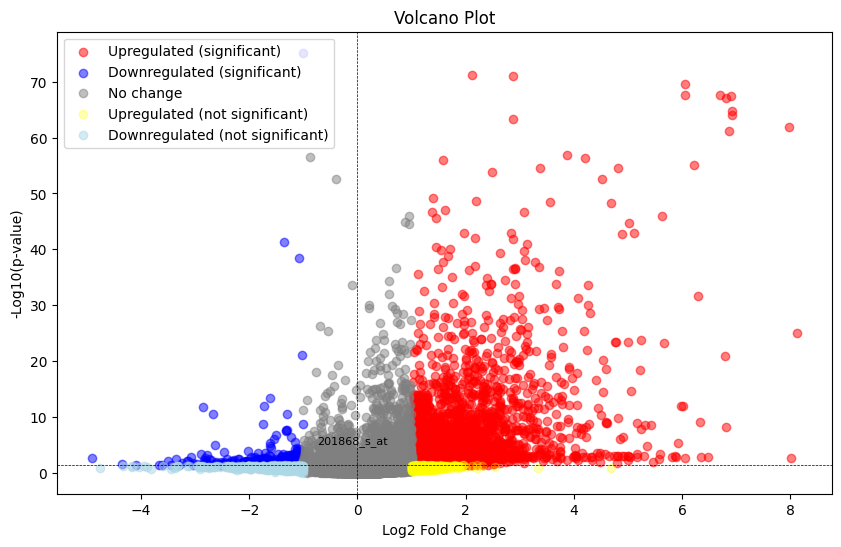

In [ ]:
import random

# Create volcano plot
plt.figure(figsize=(10, 6))

# Plot genes with significant upregulation
plt.scatter(upregulated['log2_fold_change'], -np.log10(upregulated['p_values']), color='red', label='Upregulated (significant)', alpha=0.5)

# Plot genes with significant downregulation
plt.scatter(downregulated['log2_fold_change'], -np.log10(downregulated['p_values']), color='blue', label='Downregulated (significant)', alpha=0.5)

# Plot genes with no significant change
plt.scatter(no_change['log2_fold_change'], -np.log10(no_change['p_values']), color='gray', label='No change', alpha=0.5)

# Plot genes with upregulation but not significant
plt.scatter(gene_expression_df[(gene_expression_df['log2_fold_change'] > fold_change_threshold) & (gene_expression_df['p_values'] >= p_value_threshold)]['log2_fold_change'],
            -np.log10(gene_expression_df[(gene_expression_df['log2_fold_change'] > fold_change_threshold) & (gene_expression_df['p_values'] >= p_value_threshold)]['p_values']),
            color='yellow', label='Upregulated (not significant)', alpha=0.3)

# Plot genes with downregulation but not significant
plt.scatter(gene_expression_df[(gene_expression_df['log2_fold_change'] < -fold_change_threshold) & (gene_expression_df['p_values'] >= p_value_threshold)]['log2_fold_change'],
            -np.log10(gene_expression_df[(gene_expression_df['log2_fold_change'] < -fold_change_threshold) & (gene_expression_df['p_values'] >= p_value_threshold)]['p_values']),
            color='lightblue', label='Downregulated (not significant)', alpha=0.5)

# Choose a random gene for annotation
random_gene = random.choice(gene_expression_df.index)

# Check if the gene exists in the data
if random_gene in gene_expression_df.index:
    gene_data = gene_expression_df.loc[random_gene]
    if np.isfinite(gene_data['log2_fold_change']) and np.isfinite(-np.log10(gene_data['p_values'])):
        x_coord = gene_data['log2_fold_change']
        y_coord = -np.log10(gene_data['p_values'])
        plt.annotate(random_gene, (x_coord, y_coord), textcoords="offset points", xytext=(0,20), ha='center', fontsize=8, color='black', zorder=10)
else:
    print("Gene not found in data:", random_gene)

plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10(p-value)')
plt.title('Volcano Plot')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.5)
plt.axhline(y=-np.log10(0.05), color='black', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

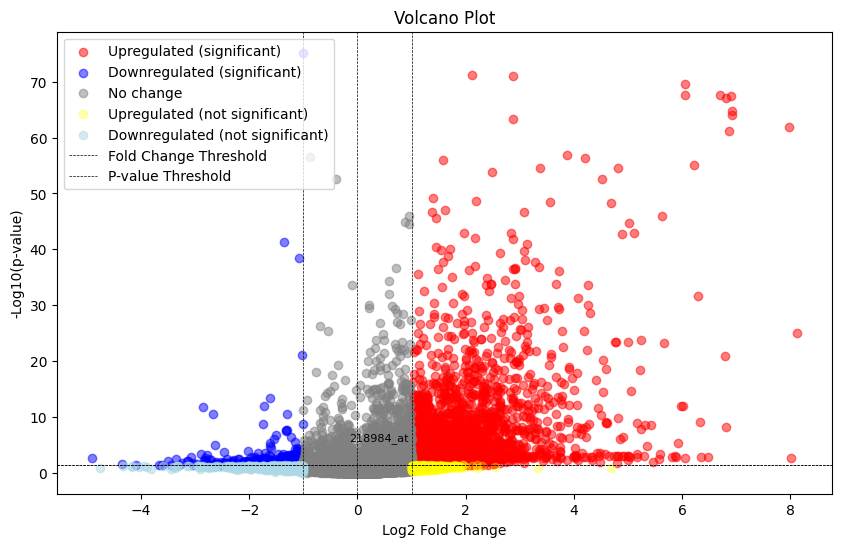

In [ ]:
import random
import matplotlib.pyplot as plt

# Define threshold values
fold_change_threshold = 1.0
p_value_threshold = 0.05

# Create volcano plot
plt.figure(figsize=(10, 6))

# Plot genes with significant upregulation
plt.scatter(upregulated['log2_fold_change'], -np.log10(upregulated['p_values']), color='red', label='Upregulated (significant)', alpha=0.5)

# Plot genes with significant downregulation
plt.scatter(downregulated['log2_fold_change'], -np.log10(downregulated['p_values']), color='blue', label='Downregulated (significant)', alpha=0.5)

# Plot genes with no significant change
plt.scatter(no_change['log2_fold_change'], -np.log10(no_change['p_values']), color='gray', label='No change', alpha=0.5)

# Plot genes with upregulation but not significant
plt.scatter(gene_expression_df[(gene_expression_df['log2_fold_change'] > fold_change_threshold) & (gene_expression_df['p_values'] >= p_value_threshold)]['log2_fold_change'],
            -np.log10(gene_expression_df[(gene_expression_df['log2_fold_change'] > fold_change_threshold) & (gene_expression_df['p_values'] >= p_value_threshold)]['p_values']),
            color='yellow', label='Upregulated (not significant)', alpha=0.3)

# Plot genes with downregulation but not significant
plt.scatter(gene_expression_df[(gene_expression_df['log2_fold_change'] < -fold_change_threshold) & (gene_expression_df['p_values'] >= p_value_threshold)]['log2_fold_change'],
            -np.log10(gene_expression_df[(gene_expression_df['log2_fold_change'] < -fold_change_threshold) & (gene_expression_df['p_values'] >= p_value_threshold)]['p_values']),
            color='lightblue', label='Downregulated (not significant)', alpha=0.5)

# Add lines for significance thresholds
plt.axvline(x=fold_change_threshold, color='black', linestyle='--', linewidth=0.5, label='Fold Change Threshold')
plt.axvline(x=-fold_change_threshold, color='black', linestyle='--', linewidth=0.5)
plt.axhline(y=-np.log10(p_value_threshold), color='black', linestyle='--', linewidth=0.5, label='P-value Threshold')

# Choose a random gene for annotation
random_gene = random.choice(gene_expression_df.index)

# Check if the gene exists in the data
if random_gene in gene_expression_df.index:
    gene_data = gene_expression_df.loc[random_gene]
    if np.isfinite(gene_data['log2_fold_change']) and np.isfinite(-np.log10(gene_data['p_values'])):
        x_coord = gene_data['log2_fold_change']
        y_coord = -np.log10(gene_data['p_values'])
        plt.annotate(random_gene, (x_coord, y_coord), textcoords="offset points", xytext=(0,20), ha='center', fontsize=8, color='black', zorder=10)
else:
    print("Gene not found in data:", random_gene)

plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10(p-value)')
plt.title('Volcano Plot')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.5)
plt.axhline(y=-np.log10(0.05), color='black', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


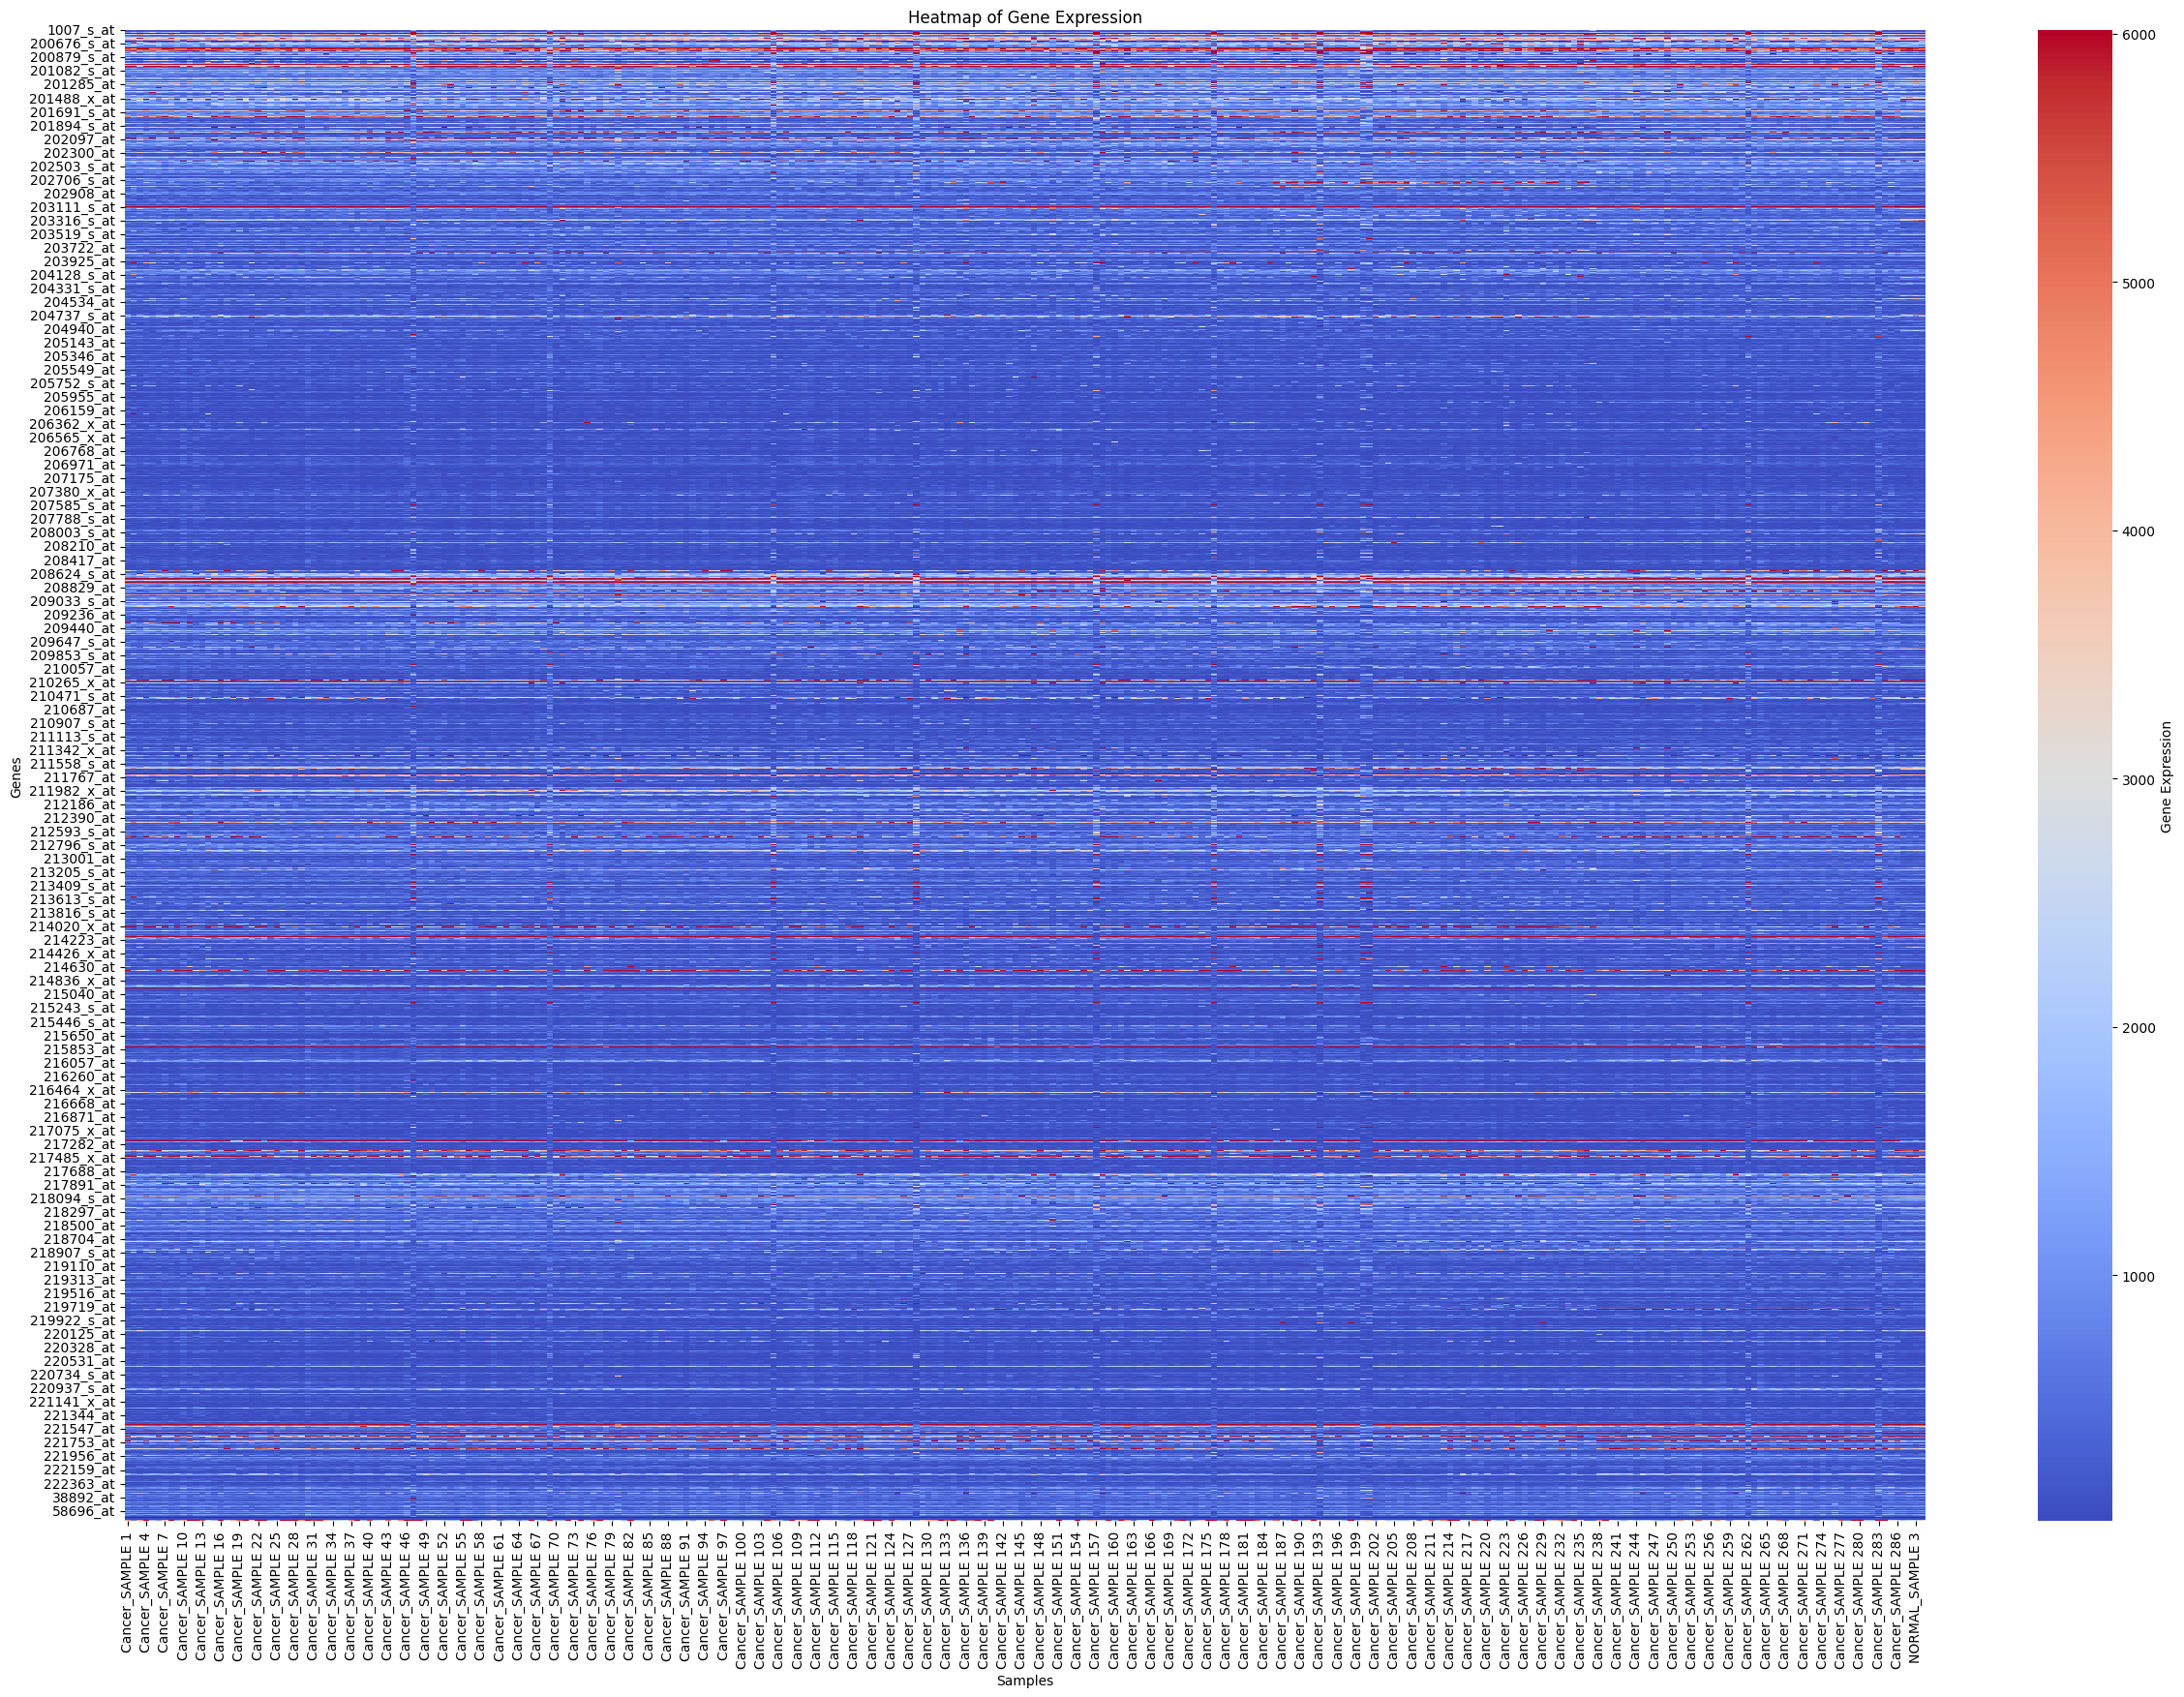

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Assuming gene_expression_df is your DataFrame containing gene expression data

# Remove the 'ID_REF' column if present
gene_expression_df1 = gene_expression_df.drop(columns=['log2_fold_change','p_values'], errors='ignore')

# Plot heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(gene_expression_df1, cmap='coolwarm', robust=True, cbar_kws={'label': 'Gene Expression'})
plt.title('Heatmap of Gene Expression')
plt.xlabel('Samples')
plt.ylabel('Genes')
plt.show()


In [ ]:
print(gene_expression_df)

#print(gene_expression_df)
gene_expression_df_t = gene_expression_df.T

# Or, transpose the DataFrame using T attribute

#print(gene_expression_df_t[:-2])
gene_expression_df_t = gene_expression_df_t[:].astype(float)
print(gene_expression_df_t)



                        Cancer_SAMPLE 1  Cancer_SAMPLE 2  Cancer_SAMPLE 3  \
ID_REF                                                                      
1007_s_at                        2057.5            945.9           1402.0   
1053_at                           367.2            336.9            394.8   
117_at                            125.1            334.8            139.8   
121_at                           1623.8           1396.1           1511.5   
1255_g_at                         151.3             49.1            128.7   
...                                 ...              ...              ...   
AFFX-r2-Hs28SrRNA-3_at             16.0             54.2             37.1   
AFFX-r2-Hs28SrRNA-5_at             14.5             23.2             66.1   
AFFX-r2-Hs28SrRNA-M_at            195.6             81.2            148.0   
AFFX-r2-P1-cre-3_at             69157.3          54318.8          53173.0   
AFFX-r2-P1-cre-5_at             63845.0          38703.9          53012.6   

KeyboardInterrupt: 

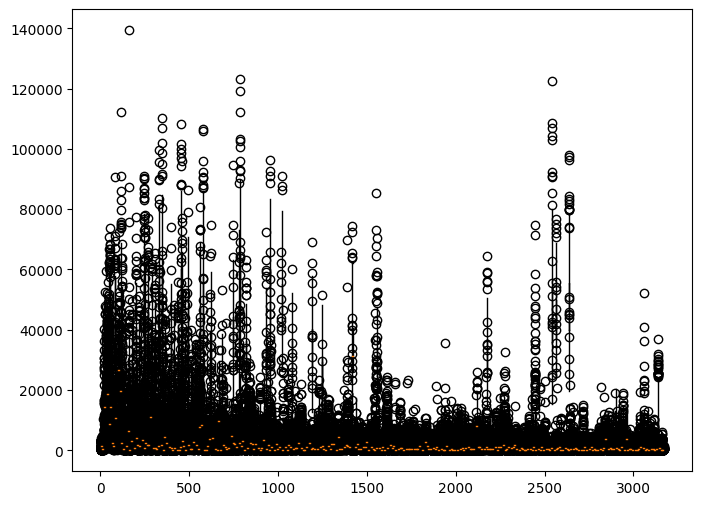

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create sample DataFrame with row names in the first column

#Plot box plots for each column (excluding the first column with row names)
plt.figure(figsize=(8, 6))
cancer_df_t = cancer_df.T
selected_df = cancer_df_t
selected_df.boxplot()
plt.title('Box Plot of Cancer')
plt.xlabel('Genes')
plt.ylabel('Expression across many samples')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create sample DataFrame with row names in the first column

#Plot box plots for each column (excluding the first column with row names)
plt.figure(figsize=(8, 6))
normal_df_t = normal_df.T
selected_df = normal_df_t
selected_df.boxplot()
plt.title('Box Plot of Normal')
plt.xlabel('Genes')
plt.ylabel('Expression across many samples')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
cancer_df_t = cancer_df.T

# Assuming gene_expression_df_t is your DataFrame
selected_df = cancer_df_t.iloc[:, :10]  # Select the first 5 columns

# Plot box plots for the selected columns
plt.figure(figsize=(8, 6))
selected_df.boxplot()
plt.title('Box Plot of First 10 Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
normal_df_t = normal_df.T

# Assuming gene_expression_df_t is your DataFrame
selected_df = normal_df_t.iloc[:, :10]  # Select the first 5 columns

# Plot box plots for the selected columns
plt.figure(figsize=(8, 6))
selected_df.boxplot()
plt.title('Box Plot of First 10 Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.grid(True)
plt.show()


In [ ]:
print(gene_expression_df_t.dtypes)

ID_REF
1007_s_at                 float64
1053_at                   float64
117_at                    float64
121_at                    float64
1255_g_at                 float64
                           ...   
AFFX-r2-Hs28SrRNA-3_at    float64
AFFX-r2-Hs28SrRNA-5_at    float64
AFFX-r2-Hs28SrRNA-M_at    float64
AFFX-r2-P1-cre-3_at       float64
AFFX-r2-P1-cre-5_at       float64
Length: 22283, dtype: object


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
cancer_df_t = cancer_df.T
normal_df_t = normal_df.T

# Get the common column names (features) in both DataFrames
common_columns = set(cancer_df_t.columns) & set(normal_df_t.columns)

# Plot two Gaussian curves for each common column
for column in common_columns:
    # Get data from both DataFrames for the current column
    data1 = cancer_df_t[column]
    data2 = normal_df_t[column]

    # Fit a normal distribution to the data for cancer samples
    mu1, std1 = norm.fit(data1)

    # Fit a normal distribution to the data for normal samples
    mu2, std2 = norm.fit(data2)

    # Plot the histograms for both sets of samples
    plt.hist(data1, bins=20, density=True, alpha=0.5, color='blue', label='Cancer')
    plt.hist(data2, bins=20, density=True, alpha=0.5, color='green', label='Normal')

    # Plot the Gaussian curves for both sets of samples
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p1 = norm.pdf(x, mu1, std1)
    p2 = norm.pdf(x, mu2, std2)
    plt.plot(x, p1, 'b', linewidth=2)
    plt.plot(x, p2, 'g', linewidth=2)

    # Add labels and legend
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.title(f'Gaussian Distribution for {column}')
    plt.legend()
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import matplotlib.pyplot as plt
cancer_df_t = cancer_df.T
normal_df_t = normal_df.T


# Get the common column names (features) in both DataFrames
common_columns = set(cancer_df_t.columns) & set(normal_df_t.columns)

# Plot box plots for each common column
for column in common_columns:
    # Get data from both DataFrames for the current column
    data1 = cancer_df_t[column]
    data2 = normal_df_t[column]

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot box plots for both sets of samples
    ax.boxplot([data1, data2], labels=['Cancer', 'Normal'])

    # Add labels and title
    ax.set_xlabel('Sample Type')
    ax.set_ylabel('Values')
    ax.set_title(f'Box Plot for {column}')

    # Show the plot
    plt.show()


In [ ]:
import pandas as pd
cancer_df_t = cancer_df.T
normal_df_t = normal_df.T


# Assuming cancer_df and normal_df are your DataFrames with samples as rows and features as columns

# Add a new column 'label' to cancer_df with value 1
cancer_df_t['label'] = 1

# Add a new column 'label' to normal_df with value 0
normal_df_t['label'] = 0

# Concatenate the two DataFrames along axis=0 (rows)
merged_df = pd.concat([cancer_df_t, normal_df_t])
print(merged_df)

# Shuffle the rows if needed
# merged_df = merged_df.sample(frac=1).reset_index(drop=True)

# # Reorder the columns to have 'label' as the first column'
# merged_df = merged_df[['label'] + [col for col in merged_df if col != 'label']]

# # Optional: Reset the index
# # merged_df.reset_index(drop=True, inplace=True)
# print(merged_df)


ID_REF             1007_s_at  1053_at  117_at  121_at  1255_g_at  1294_at  \
Cancer_SAMPLE 1       2057.5    367.2   125.1  1623.8      151.3   2264.5   
Cancer_SAMPLE 2        945.9    336.9   334.8  1396.1       49.1   1458.1   
Cancer_SAMPLE 3       1402.0    394.8   139.8  1511.5      128.7    877.0   
Cancer_SAMPLE 4        804.8    613.9   204.4  1756.9       22.6   2219.9   
Cancer_SAMPLE 5       1055.4    405.3   226.9  1751.7      125.3   1919.3   
...                      ...      ...     ...     ...        ...      ...   
Cancer_SAMPLE 286      968.3    580.4   148.4  1777.7       99.6   1974.8   
NORMAL_SAMPLE 1        876.4    498.6   212.0  1557.8       37.2   1193.7   
NORMAL_SAMPLE 2        823.1    556.7    74.1  1379.2       88.5    764.4   
NORMAL_SAMPLE 3        623.8    393.0   181.3  1659.5       82.3    858.9   
NORMAL_SAMPLE 4        677.2    317.9   229.1  2054.5      108.8    942.6   

ID_REF             1316_at  1320_at  1405_i_at  1431_at  ...  \
Cancer_SAMP

In [ ]:
import pandas as pd

# Assuming merged_df is your DataFrame

# Rename all rows to 'row'
merged_df.index = ['row'] * len(merged_df)

# Print the DataFrame to verify the changes
print(merged_df)


ID_REF  1007_s_at  1053_at  117_at  121_at  1255_g_at  1294_at  1316_at  \
row        2057.5    367.2   125.1  1623.8      151.3   2264.5    347.1   
row         945.9    336.9   334.8  1396.1       49.1   1458.1    141.2   
row        1402.0    394.8   139.8  1511.5      128.7    877.0    199.1   
row         804.8    613.9   204.4  1756.9       22.6   2219.9    183.4   
row        1055.4    405.3   226.9  1751.7      125.3   1919.3    218.4   
..            ...      ...     ...     ...        ...      ...      ...   
row         968.3    580.4   148.4  1777.7       99.6   1974.8    283.7   
row         876.4    498.6   212.0  1557.8       37.2   1193.7    207.6   
row         823.1    556.7    74.1  1379.2       88.5    764.4    231.0   
row         623.8    393.0   181.3  1659.5       82.3    858.9    172.3   
row         677.2    317.9   229.1  2054.5      108.8    942.6    282.3   

ID_REF  1320_at  1405_i_at  1431_at  ...  AFFX-r2-Ec-bioD-5_at  \
row       190.4      284.4    103

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 1: Data Preprocessing
# Assume X contains features and y contains the labels
X = merged_df.drop('label', axis=1)
y = merged_df['label']


# Step 2: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Choose a Model
model = LogisticRegression()

# Step 4: Train the Model
model.fit(X_train, y_train)


# Step 5: Evaluate the Model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 6: Tune Hyperparameters (Optional)
# You can use techniques like GridSearchCV or RandomizedSearchCV for hyperparameter tuning


Accuracy: 1.0


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Separate features (X) and target variable (y)
X = merged_df.iloc[:, :-1]  # Features are all columns except the last one (label)
y = merged_df['label']

# Feature selection using Chi2
num_features_to_select = 5  # Number of important features to select
chi2_selector = SelectKBest(chi2, k=num_features_to_select)
X_chi2_selected = chi2_selector.fit_transform(X, y)

# Get the indices of selected features
selected_feature_indices = chi2_selector.get_support(indices=True)

# Get the names of selected features
selected_feature_names = X.columns[selected_feature_indices]

# Create a DataFrame with only the selected features
selected_features_df = merged_df[['label'] + list(selected_feature_names)]
print(selected_features_df)


ID_REF  label  202388_at  205297_s_at  205967_at  215121_x_at  \
row         1      260.5       3335.5      895.7       8006.6   
row         1     5362.7        971.9      629.7        882.3   
row         1     2222.6       1872.2     1380.9       2806.8   
row         1     1715.8       1953.3      725.5       1221.2   
row         1      378.0       2713.3     1583.0       1001.4   
..        ...        ...          ...        ...          ...   
row         1      147.6       3139.4      746.7       9790.6   
row         0    26676.0      17389.2     3512.1      31642.3   
row         0    29835.8      11257.6    35751.3      25146.5   
row         0    26896.7      17637.0    22363.4      24742.4   
row         0    25562.5      16637.5     8937.1      38082.2   

ID_REF  AFFX-r2-Hs28SrRNA-3_at  
row                       16.0  
row                       54.2  
row                       37.1  
row                       14.0  
row                      185.8  
..                   

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Separate features (X) and target variable (y)
X = merged_df.iloc[:, :-1]  # Features are all columns except the last one (label)
y = merged_df['label']

# Standardization
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# PCA
num_components = 2  # Number of principal components to keep
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_standardized)

# Combine PCA-transformed features with the class label
pca_features_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(num_components)])
pca_features_df['label'] = y.values

print(pca_features_df.head())


         PC1        PC2  label
0  -7.775592  26.552497      1
1 -15.318141 -18.244221      1
2 -10.707716   4.651827      1
3  -5.168788   9.477327      1
4 -11.583551  -0.042298      1


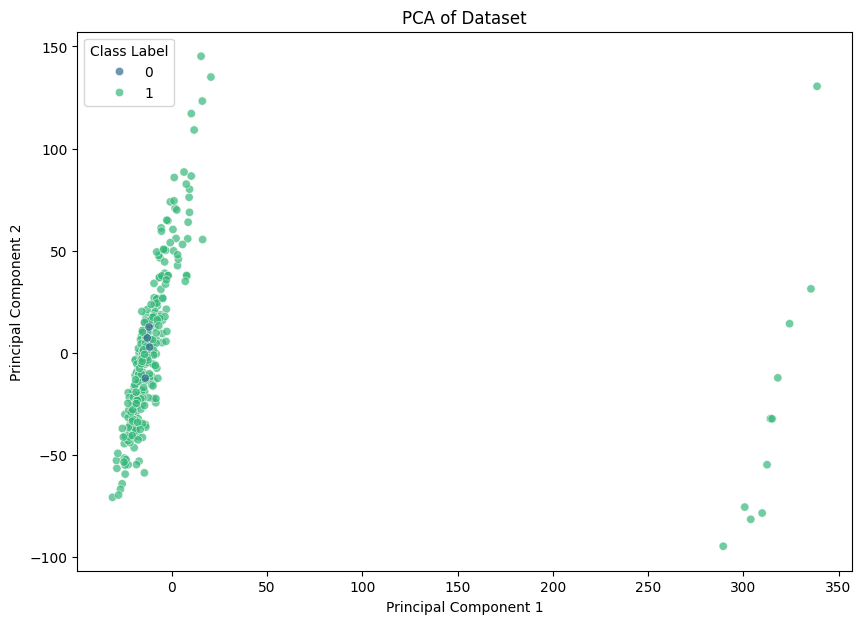

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Separate features (X) and target variable (y)
X = merged_df.iloc[:, :-1]  # Features are all columns except the last one (label)
y = merged_df['label']

# Standardization
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# PCA
num_components = 2  # Number of principal components to keep
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_standardized)

# Combine PCA-transformed features with the class label
pca_features_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(num_components)])
pca_features_df['label'] = y.values

# Plotting
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='label', data=pca_features_df, palette='viridis', alpha=0.7)
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class Label')
plt.show()


In [ ]:
# Separate DataFrame based on label values
cancer_samples = selected_features_df[selected_features_df['label'] == 1].drop(columns=['label'])
normal_samples = selected_features_df[selected_features_df['label'] == 0].drop(columns=['label'])
cancer_samples_t=cancer_samples.T
normal_samples_t=normal_samples.T


In [ ]:
print(cancer_samples_t)

                        Cancer_SAMPLE 1  Cancer_SAMPLE 2  Cancer_SAMPLE 3  \
ID_REF                                                                      
200772_x_at                     18823.8          13757.8          26414.7   
200920_s_at                     11358.1           6184.4           8505.5   
201041_s_at                      5587.4          10724.0          14503.1   
201044_x_at                        55.9            400.2            641.7   
201303_at                        2306.1           2163.7           2405.6   
...                                 ...              ...              ...   
221969_at                        2563.2            567.0           8756.3   
44790_s_at                        202.2            236.5             15.5   
AFFX-M27830_5_at                   92.9             92.1            190.0   
AFFX-M27830_M_at                  107.7            107.9            358.5   
AFFX-r2-Hs28SrRNA-3_at             16.0             54.2             37.1   

In [ ]:
cancer_samples_mean = cancer_samples_t.mean(axis=1)
normal_samples_mean = normal_samples_t.mean(axis=1)
# Calculate the log2 fold change
log2_fold_change = np.log2(cancer_samples_mean / normal_samples_mean)



# Display the log2 fold change
print("Log2 fold change:")
print(log2_fold_change)


Log2 fold change:
ID_REF
200772_x_at              -0.947511
200920_s_at              -2.085643
201041_s_at              -1.615367
201044_x_at              -3.362836
201303_at                -1.938632
                            ...   
221969_at                -1.963089
44790_s_at               -2.607336
AFFX-M27830_5_at         -4.169363
AFFX-M27830_M_at         -3.611824
AFFX-r2-Hs28SrRNA-3_at   -4.752757
Length: 100, dtype: float64


In [ ]:
import numpy as np
from scipy.stats import ttest_ind



# Extract expression values for each gene across all normal samples
normal_expression_values = normal_samples_t.iloc[:, 1:].values




# Extract expression values for each gene across all cancer samples
cancer_expression_values = cancer_samples_t.iloc[:, 1:].values


# Perform t-test for each gene
p_values = np.array([])
for gene_idx in range(normal_expression_values.shape[0]):  # Iterate over genes
    t_statistic, p_value = ttest_ind(normal_expression_values[gene_idx, :], cancer_expression_values[gene_idx, :], equal_var=False)
    p_values = np.append(p_values, p_value)


print(p_values.shape)


(100,)


In [ ]:
import pandas as pd
print(log2_fold_change)


# Assuming df1 and df2 are your DataFrames
gene_expression_df = pd.concat([cancer_samples_t, normal_samples_t], axis=1, join='outer')
gene_expression_df['log2_fold_change'] = log2_fold_change
gene_expression_df['p_values'] = p_values


# Display the concatenated DataFrame
print(gene_expression_df)
# Remove any null values from the DataFrame




ID_REF
200772_x_at              -0.947511
200920_s_at              -2.085643
201041_s_at              -1.615367
201044_x_at              -3.362836
201303_at                -1.938632
                            ...   
221969_at                -1.963089
44790_s_at               -2.607336
AFFX-M27830_5_at         -4.169363
AFFX-M27830_M_at         -3.611824
AFFX-r2-Hs28SrRNA-3_at   -4.752757
Length: 100, dtype: float64
                        Cancer_SAMPLE 1  Cancer_SAMPLE 2  Cancer_SAMPLE 3  \
ID_REF                                                                      
200772_x_at                     18823.8          13757.8          26414.7   
200920_s_at                     11358.1           6184.4           8505.5   
201041_s_at                      5587.4          10724.0          14503.1   
201044_x_at                        55.9            400.2            641.7   
201303_at                        2306.1           2163.7           2405.6   
...                                 ...  

In [ ]:

# Identify differentially expressed genes
fold_change_threshold, p_value_threshold = 1, 0.05
# Identify differentially expressed genes
upregulated = gene_expression_df[(gene_expression_df['log2_fold_change'] > fold_change_threshold) & (gene_expression_df['p_values'] < p_value_threshold)]
downregulated = gene_expression_df[(gene_expression_df['log2_fold_change'] < -fold_change_threshold) & (gene_expression_df['p_values'] < p_value_threshold)]
no_change = gene_expression_df[abs(gene_expression_df['log2_fold_change']) <= fold_change_threshold]

# Handle the error here


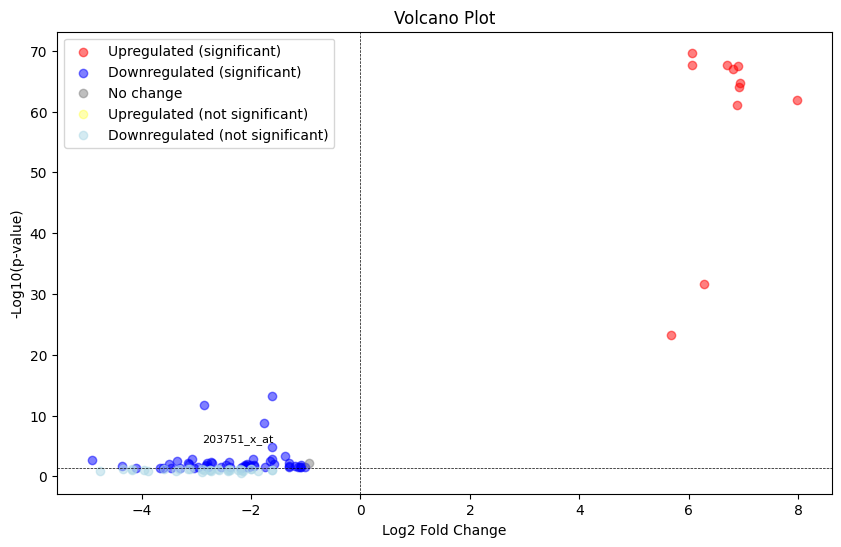

In [ ]:
import random

# Create volcano plot
plt.figure(figsize=(10, 6))

# Plot genes with significant upregulation
plt.scatter(upregulated['log2_fold_change'], -np.log10(upregulated['p_values']), color='red', label='Upregulated (significant)', alpha=0.5)

# Plot genes with significant downregulation
plt.scatter(downregulated['log2_fold_change'], -np.log10(downregulated['p_values']), color='blue', label='Downregulated (significant)', alpha=0.5)

# Plot genes with no significant change
plt.scatter(no_change['log2_fold_change'], -np.log10(no_change['p_values']), color='gray', label='No change', alpha=0.5)

# Plot genes with upregulation but not significant
plt.scatter(gene_expression_df[(gene_expression_df['log2_fold_change'] > fold_change_threshold) & (gene_expression_df['p_values'] >= p_value_threshold)]['log2_fold_change'],
            -np.log10(gene_expression_df[(gene_expression_df['log2_fold_change'] > fold_change_threshold) & (gene_expression_df['p_values'] >= p_value_threshold)]['p_values']),
            color='yellow', label='Upregulated (not significant)', alpha=0.3)

# Plot genes with downregulation but not significant
plt.scatter(gene_expression_df[(gene_expression_df['log2_fold_change'] < -fold_change_threshold) & (gene_expression_df['p_values'] >= p_value_threshold)]['log2_fold_change'],
            -np.log10(gene_expression_df[(gene_expression_df['log2_fold_change'] < -fold_change_threshold) & (gene_expression_df['p_values'] >= p_value_threshold)]['p_values']),
            color='lightblue', label='Downregulated (not significant)', alpha=0.5)

# Choose a random gene for annotation
random_gene = random.choice(gene_expression_df.index)

# Check if the gene exists in the data
if random_gene in gene_expression_df.index:
    gene_data = gene_expression_df.loc[random_gene]
    if np.isfinite(gene_data['log2_fold_change']) and np.isfinite(-np.log10(gene_data['p_values'])):
        x_coord = gene_data['log2_fold_change']
        y_coord = -np.log10(gene_data['p_values'])
        plt.annotate(random_gene, (x_coord, y_coord), textcoords="offset points", xytext=(0,20), ha='center', fontsize=8, color='black', zorder=10)
else:
    print("Gene not found in data:", random_gene)

plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10(p-value)')
plt.title('Volcano Plot')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.5)
plt.axhline(y=-np.log10(0.05), color='black', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

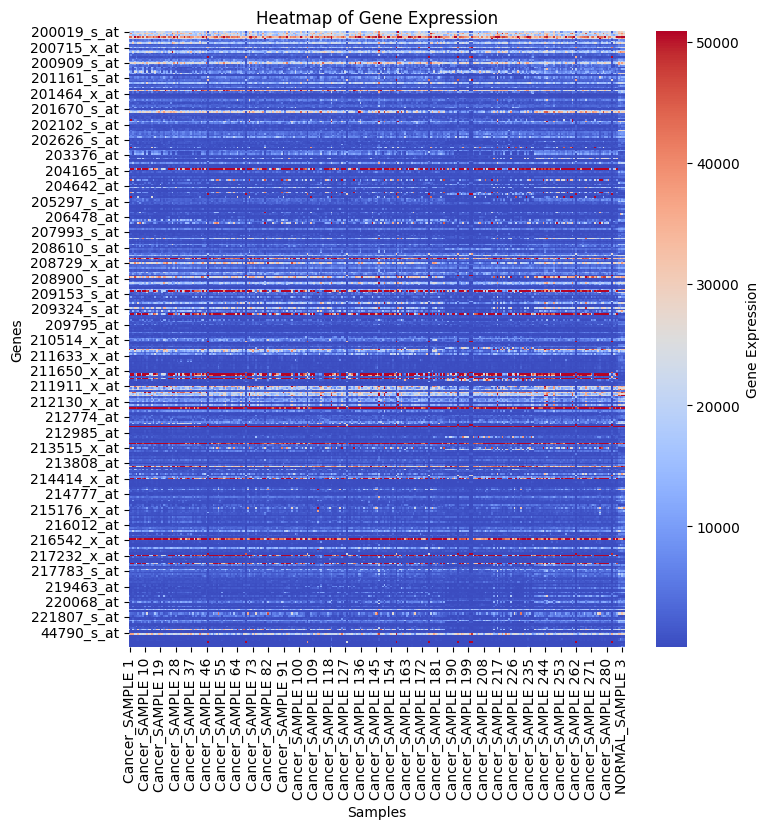

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Assuming gene_expression_df is your DataFrame containing gene expression data

# Remove the 'ID_REF' column if present
gene_expression_df1 = gene_expression_df.drop(columns=['log2_fold_change','p_values'], errors='ignore')

# Plot heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(gene_expression_df1, cmap='coolwarm', robust=True, cbar_kws={'label': 'Gene Expression'})
plt.title('Heatmap of Gene Expression')
plt.xlabel('Samples')
plt.ylabel('Genes')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming gene_expression_df is your DataFrame containing gene expression data

# Remove the 'ID_REF' column if present
gene_expression_df1 = gene_expression_df.drop(columns=['log2_fold_change', 'p_values'], errors='ignore')

# Determine the number of genes and samples
num_genes, num_samples = gene_expression_df1.shape

# Set the size of the heatmap based on the number of genes and samples
fig_height = min(100, max(8, num_genes * 100))
fig_width = min(100, max(8, num_samples * 100))

# Plot heatmap
plt.figure(figsize=(fig_width, fig_height))
sns.heatmap(gene_expression_df1, cmap='coolwarm', robust=True, cbar_kws={'label': 'Gene Expression'})
plt.title('Heatmap of Gene Expression')
plt.xlabel('Samples')
plt.ylabel('Genes')
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Drop rows with NaN values in the 'label' column
selected_features_df1 = selected_features_df.dropna(subset=['label'])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Extract the feature columns (excluding the 'label' column)
features = selected_features_df.drop(columns=['label'])

# Normalize the feature columns
normalized_features = scaler.fit_transform(features)

# Create a new DataFrame with the normalized features and the 'label' column
normalized_df = pd.DataFrame(normalized_features, columns=features.columns)
normalized_df['label'] = selected_features_df['label'].reset_index(drop=True)

# Print the normalized DataFrame
print(selected_features_df)


ID_REF  label  202388_at  205297_s_at  205967_at  215121_x_at  \
row         1      260.5       3335.5      895.7       8006.6   
row         1     5362.7        971.9      629.7        882.3   
row         1     2222.6       1872.2     1380.9       2806.8   
row         1     1715.8       1953.3      725.5       1221.2   
row         1      378.0       2713.3     1583.0       1001.4   
..        ...        ...          ...        ...          ...   
row         1      147.6       3139.4      746.7       9790.6   
row         0    26676.0      17389.2     3512.1      31642.3   
row         0    29835.8      11257.6    35751.3      25146.5   
row         0    26896.7      17637.0    22363.4      24742.4   
row         0    25562.5      16637.5     8937.1      38082.2   

ID_REF  AFFX-r2-Hs28SrRNA-3_at  
row                       16.0  
row                       54.2  
row                       37.1  
row                       14.0  
row                      185.8  
..                   

In [ ]:
# Count the number of data points with labels 0 and 1
label_counts = normalized_df['label'].value_counts()

# Print the counts
print("Number of data points with label 0:", label_counts[0])
print("Number of data points with label 1:", label_counts[1])


Number of data points with label 0: 4
Number of data points with label 1: 286


In [ ]:
# # import pandas as pd
# # from imblearn.over_sampling import SMOTE

# # # Separate features and labels
# # X = selected_features_normalized_df.drop(columns=['label'])
# # y = selected_features_df['label']

# # # Apply SMOTE to the entire dataset
# # smote = SMOTE(k_neighbors=3,random_state=42)
# # X_resampled, y_resampled = smote.fit_resample(X, y)

# # # Combine resampled features and labels into a DataFrame
# # resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
# # resampled_df['label'] = y_resampled

# # # Print the new merged_df after SMOTE
# # print(resampled_df)
# import pandas as pd
# from imblearn.over_sampling import RandomOverSampler

# # Separate features and labels
# X = normalized_df.drop(columns=['label'])
# y = selected_features_df['label']

# # Apply Random Oversampling to the entire dataset
# oversampler = RandomOverSampler(random_state=42)
# X_resampled, y_resampled = oversampler.fit_resample(X, y)

# # Combine resampled features and labels into a DataFrame
# resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
# resampled_df['label'] = y_resampled

# # Print the new merged_df after Random Oversampling
# print(resampled_df)
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Separate features and labels
X = normalized_df.drop(columns=['label'])  # Use normalized_df for features
y = normalized_df['label']  # Use normalized_df for labels as well

# Apply Random Oversampling to the entire dataset
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Combine resampled features and labels into a DataFrame
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['label'] = y_resampled

# Print the new resampled_df after Random Oversampling
print(resampled_df)



ID_REF  202388_at  205297_s_at  205967_at  215121_x_at  \
0        0.008369     0.188383   0.024830     0.081751   
1        0.179441     0.054248   0.017388     0.008919   
2        0.074156     0.105340   0.038405     0.028593   
3        0.057164     0.109943   0.020068     0.012383   
4        0.012309     0.153073   0.044059     0.010136   
..            ...          ...        ...          ...   
567      1.000000     0.637966   1.000000     0.256975   
568      0.894055     0.985937   0.098030     0.323382   
569      1.000000     0.637966   1.000000     0.256975   
570      0.856720     0.943278   0.249808     0.389218   
571      0.856720     0.943278   0.249808     0.389218   

ID_REF  AFFX-r2-Hs28SrRNA-3_at  label  
0                     0.000959      1  
1                     0.004588      1  
2                     0.002964      1  
3                     0.000769      1  
4                     0.017089      1  
..                         ...    ...  
567                   0

In [ ]:
# Count the number of data points with labels 0 and 1
label_counts = resampled_df['label'].value_counts()

# Print the counts
print("Number of data points with label 0:", label_counts[0])
print("Number of data points with label 1:", label_counts[1])


Number of data points with label 0: 286
Number of data points with label 1: 286


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Perform train-test split on the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Optionally, you can print the shapes of the train and test sets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print(y_test)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now, you can use X_train_scaled and X_test_scaled to train your models


Shape of X_train: (457, 5)
Shape of X_test: (115, 5)
Shape of y_train: (457,)
Shape of y_test: (115,)
512    0
70     1
131    1
404    0
543    0
      ..
75     1
250    1
529    0
522    0
68     1
Name: label, Length: 115, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the classifiers with regularization
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=2),
    "Logistic Regression": LogisticRegression(random_state=2, C=1.0),  # Add regularization parameter C
    "Support Vector Machine": SVC(random_state=2, C=1.0, kernel='linear'),  # Add regularization parameter C and specify kernel
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    # Add the proposed LVTrees algorithm if available
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  # Train the classifier

    y_pred = clf.predict(X_test)  # Predict the labels for the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f"{name}: Accuracy = {accuracy:.2f}")


Random Forest: Accuracy = 1.00
Logistic Regression: Accuracy = 1.00
Support Vector Machine: Accuracy = 1.00
K-Nearest Neighbors: Accuracy = 1.00
Naive Bayes: Accuracy = 0.99
Extra Trees: Accuracy = 1.00
Decision Tree: Accuracy = 1.00
AdaBoost: Accuracy = 1.00


In [ ]:



















from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
dict={}
# Initialize ensemble classifiers
ensemble_classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42)
}

# Train and evaluate ensemble classifiers
for name, clf in ensemble_classifiers.items():
    clf.fit(X_train, y_train)  # Train the ensemble classifier
    y_pred = clf.predict(X_test)  # Predict labels for the test set

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print evaluation metrics
    print(f"{name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print()


Random Forest:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00

AdaBoost:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00

Extra Trees:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Dictionary to store models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier()
}

# Loop through each model
for name, model in models.items():
    print("Training", name)
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Print classification report
    print("Classification Report for", name)
    print(classification_report(y_test, y_pred))
    print("="*50)


Training Decision Tree
Accuracy: 1.0
Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        65

    accuracy                           1.00       115
   macro avg       1.00      1.00      1.00       115
weighted avg       1.00      1.00      1.00       115

Training Random Forest
Accuracy: 1.0
Classification Report for Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        65

    accuracy                           1.00       115
   macro avg       1.00      1.00      1.00       115
weighted avg       1.00      1.00      1.00       115

Training Support Vector Machine
Accuracy: 1.0
Classification Report for Support Vector Machine
              precision    recall  f1-score   support

           0       1.00      1.00      1.0

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Predictions
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy}')


Epoch 1/50
15/15 [==============================] - 2s 29ms/step - loss: 2.1877 - accuracy: 0.6958 - val_loss: 1.8788 - val_accuracy: 0.9304
Epoch 2/50
15/15 [==============================] - 0s 8ms/step - loss: 1.7103 - accuracy: 0.9168 - val_loss: 1.4769 - val_accuracy: 0.9913
Epoch 3/50
15/15 [==============================] - 0s 8ms/step - loss: 1.3706 - accuracy: 0.9869 - val_loss: 1.2205 - val_accuracy: 0.9913
Epoch 4/50
15/15 [==============================] - 0s 9ms/step - loss: 1.1491 - accuracy: 0.9956 - val_loss: 1.0371 - val_accuracy: 0.9913
Epoch 5/50
15/15 [==============================] - 0s 8ms/step - loss: 0.9814 - accuracy: 1.0000 - val_loss: 0.8874 - val_accuracy: 0.9913
Epoch 6/50
15/15 [==============================] - 0s 9ms/step - loss: 0.8367 - accuracy: 0.9956 - val_loss: 0.7633 - val_accuracy: 0.9913
Epoch 7/50
15/15 [==============================] - 0s 9ms/step - loss: 0.7127 - accuracy: 1.0000 - val_loss: 0.6513 - val_accuracy: 0.9913
Epoch 8/50
15/15 [=

1.0


In [ ]:
#############################################################################################################




In [ ]:
import pandas as pd
import os

# Directory containing all CSV files
directory1 = "/content/drive/MyDrive/MLL_CSV"

# List to store DataFrames for each person
dfs_MLL = []

# List to store 'ID_REF' columns for each person
id_refs_MLL = []

# Iterate over each CSV file in the directory
for filename in os.listdir(directory1):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory1, filename)

        # Read CSV file into a DataFrame
        df = pd.read_csv(file_path, skiprows=1, header=None, names=['ID_REF', 'VALUE', 'ABS_CALL', 'DETECTION P-VALUE'])

        # Remove specified columns 'ABS_CALL' and 'DETECTION P-VALUE'
        df.drop(columns=['ABS_CALL', 'DETECTION P-VALUE'], inplace=True)

        # Store 'ID_REF' column only once
        if not id_refs_MLL:
            id_refs_MLL.append(df['ID_REF'])

        # Store 'VALUE' column
        dfs_MLL.append(df['VALUE'])

# Concatenate 'VALUE' columns from all DataFrames into a single DataFrame
concatenated_df = pd.concat(dfs_MLL, axis=1)

# Concatenate 'ID_REF' column with 'VALUE' DataFrame
MLL_df = pd.concat([id_refs_normal[0], concatenated_df], axis=1)

# Set 'ID_REF' column as index (row names)
MLL_df.set_index('ID_REF', inplace=True)

# Rename 'VALUE' columns with sample names
sample_names = [f"MLL_SAMPLE {i+1}" for i in range(len(dfs_MLL))]
MLL_df.columns = sample_names

# Display the final DataFrame
print(MLL_df)


                        MLL_SAMPLE 1  MLL_SAMPLE 2  MLL_SAMPLE 3  \
ID_REF                                                             
1007_s_at                      245.9         525.4         391.8   
1053_at                        535.5         531.2         414.9   
117_at                         117.4         270.3         566.5   
121_at                        1294.2        2179.6        1944.1   
1255_g_at                      109.3         121.3          70.6   
...                              ...           ...           ...   
AFFX-r2-Hs28SrRNA-3_at          42.3         225.8         385.8   
AFFX-r2-Hs28SrRNA-5_at          39.1          39.5          29.6   
AFFX-r2-Hs28SrRNA-M_at         207.0         191.2         388.9   
AFFX-r2-P1-cre-3_at          66585.4      134117.1      122132.0   
AFFX-r2-P1-cre-5_at          56949.0      136661.4      106901.3   

                        MLL_SAMPLE 4  MLL_SAMPLE 5  MLL_SAMPLE 6  \
ID_REF                                         

In [ ]:
import pandas as pd
import os

# Directory containing all CSV files for HYPO data
directory2 = "/content/drive/MyDrive/HYPO_CSV"

# List to store DataFrames for each person
dfs_HYPO = []

# List to store 'ID_REF' columns for each person
id_refs_HYPO = []

# Iterate over each CSV file in the directory
for filename in os.listdir(directory2):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory2, filename)

        # Read CSV file into a DataFrame
        df = pd.read_csv(file_path, skiprows=1, header=None, names=['ID_REF', 'VALUE', 'ABS_CALL', 'DETECTION P-VALUE'])

        # Remove specified columns 'ABS_CALL' and 'DETECTION P-VALUE'
        df.drop(columns=['ABS_CALL', 'DETECTION P-VALUE'], inplace=True)

        # Store 'ID_REF' column only once
        if not id_refs_HYPO:
            id_refs_HYPO.append(df['ID_REF'])

        # Store 'VALUE' column
        dfs_HYPO.append(df['VALUE'])

# Concatenate 'VALUE' columns from all DataFrames into a single DataFrame
concatenated_df = pd.concat(dfs_HYPO, axis=1)

# Concatenate 'ID_REF' column with 'VALUE' DataFrame
HYPO_df = pd.concat([id_refs_HYPO[0], concatenated_df], axis=1)

# Set 'ID_REF' column as index (row names)
HYPO_df.set_index('ID_REF', inplace=True)

# Rename 'VALUE' columns with sample names
sample_names = [f"HYPO_SAMPLE {i+1}" for i in range(len(dfs_HYPO))]
HYPO_df.columns = sample_names

# Display the final DataFrame
print(HYPO_df)


                        HYPO_SAMPLE 1  HYPO_SAMPLE 2  HYPO_SAMPLE 3  \
ID_REF                                                                
1007_s_at                       735.2         1361.0          189.5   
1053_at                         355.9          445.3          555.3   
117_at                          150.2          245.0          362.6   
121_at                         2333.4         1596.7         2180.0   
1255_g_at                       189.0           79.5          258.6   
...                               ...            ...            ...   
AFFX-r2-Hs28SrRNA-3_at          144.1           68.4           58.3   
AFFX-r2-Hs28SrRNA-5_at           22.8           43.9           31.7   
AFFX-r2-Hs28SrRNA-M_at          347.8          269.4          203.8   
AFFX-r2-P1-cre-3_at          105609.7        54732.7       115385.9   
AFFX-r2-P1-cre-5_at          104236.7        44479.1        81890.1   

                        HYPO_SAMPLE 4  HYPO_SAMPLE 5  HYPO_SAMPLE 6  \
ID_RE

In [ ]:
import pandas as pd
import os

# Directory containing all CSV files for HYPER data
directory3 = "/content/drive/MyDrive/HYPER_CSV"

# List to store DataFrames for each person
dfs_HYPER = []

# List to store 'ID_REF' columns for each person
id_refs_HYPER = []

# Iterate over each CSV file in the directory
for filename in os.listdir(directory3):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory3, filename)

        # Read CSV file into a DataFrame
        df = pd.read_csv(file_path, skiprows=1, header=None, names=['ID_REF', 'VALUE', 'ABS_CALL', 'DETECTION P-VALUE'])

        # Remove specified columns 'ABS_CALL' and 'DETECTION P-VALUE'
        df.drop(columns=['ABS_CALL', 'DETECTION P-VALUE'], inplace=True)

        # Store 'ID_REF' column only once
        if not id_refs_HYPER:
            id_refs_HYPER.append(df['ID_REF'])

        # Store 'VALUE' column
        dfs_HYPER.append(df['VALUE'])

# Concatenate 'VALUE' columns from all DataFrames into a single DataFrame
concatenated_df = pd.concat(dfs_HYPER, axis=1)

# Concatenate 'ID_REF' column with 'VALUE' DataFrame
HYPER_df = pd.concat([id_refs_HYPER[0], concatenated_df], axis=1)

# Set 'ID_REF' column as index (row names)
HYPER_df.set_index('ID_REF', inplace=True)

# Rename 'VALUE' columns with sample names
sample_names = [f"HYPER_SAMPLE {i+1}" for i in range(len(dfs_HYPER))]
HYPER_df.columns = sample_names

# Display the final DataFrame
print(HYPER_df)


                        HYPER_SAMPLE 1  HYPER_SAMPLE 2  HYPER_SAMPLE 3  \
ID_REF                                                                   
1007_s_at                       1045.8           598.3           903.2   
1053_at                          359.5           490.7           541.4   
117_at                           315.3           161.3           229.9   
121_at                          1685.0          1860.4          2189.4   
1255_g_at                         57.0           124.7            89.5   
...                                ...             ...             ...   
AFFX-r2-Hs28SrRNA-3_at           268.5            12.2            46.6   
AFFX-r2-Hs28SrRNA-5_at            92.7            14.6            14.4   
AFFX-r2-Hs28SrRNA-M_at           131.4           189.8           246.8   
AFFX-r2-P1-cre-3_at            86237.8         74311.8         85752.0   
AFFX-r2-P1-cre-5_at            83431.0         61142.1         83153.5   

                        HYPER_SAMPLE 

In [ ]:
import pandas as pd
import os

# Directory containing all CSV files for ETV data
directory3 = "/content/drive/MyDrive/ETV_CSV"

# List to store DataFrames for each person
dfs_ETV = []

# List to store 'ID_REF' columns for each person
id_refs_ETV = []

# Iterate over each CSV file in the directory
for filename in os.listdir(directory3):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory3, filename)

        # Read CSV file into a DataFrame
        df = pd.read_csv(file_path, skiprows=1, header=None, names=['ID_REF', 'VALUE', 'ABS_CALL', 'DETECTION P-VALUE'])

        # Remove specified columns 'ABS_CALL' and 'DETECTION P-VALUE'
        df.drop(columns=['ABS_CALL', 'DETECTION P-VALUE'], inplace=True)

        # Store 'ID_REF' column only once
        if not id_refs_ETV:
            id_refs_ETV.append(df['ID_REF'])

        # Store 'VALUE' column
        dfs_ETV.append(df['VALUE'])

# Concatenate 'VALUE' columns from all DataFrames into a single DataFrame
concatenated_df = pd.concat(dfs_ETV, axis=1)

# Concatenate 'ID_REF' column with 'VALUE' DataFrame
ETV_df = pd.concat([id_refs_ETV[0], concatenated_df], axis=1)

# Set 'ID_REF' column as index (row names)
ETV_df.set_index('ID_REF', inplace=True)

# Rename 'VALUE' columns with sample names
sample_names = [f"ETV_SAMPLE {i+1}" for i in range(len(dfs_ETV))]
ETV_df.columns = sample_names

# Display the final DataFrame
print(ETV_df)


                        ETV_SAMPLE 1  ETV_SAMPLE 2  ETV_SAMPLE 3  \
ID_REF                                                             
1007_s_at                      570.7         889.1         756.2   
1053_at                        206.8         376.4         332.6   
117_at                         195.5         127.9          43.7   
121_at                        1225.6        1166.4         964.5   
1255_g_at                      155.0          61.3         103.8   
...                              ...           ...           ...   
AFFX-r2-Hs28SrRNA-3_at          19.4           8.4          12.4   
AFFX-r2-Hs28SrRNA-5_at          29.4          84.5          19.9   
AFFX-r2-Hs28SrRNA-M_at          10.9          44.9         145.7   
AFFX-r2-P1-cre-3_at          65895.4       39251.8       69390.5   
AFFX-r2-P1-cre-5_at          65289.7       31776.9       58144.4   

                        ETV_SAMPLE 4  ETV_SAMPLE 5  ETV_SAMPLE 6  \
ID_REF                                         

In [ ]:

import pandas as pd
import os

# Directory containing all CSV files for E2A data
directory3 = "/content/drive/MyDrive/E2A_CSV"

# List to store DataFrames for each person
dfs_E2A = []

# List to store 'ID_REF' columns for each person
id_refs_E2A = []

# Iterate over each CSV file in the directory
for filename in os.listdir(directory3):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory3, filename)

        # Read CSV file into a DataFrame
        df = pd.read_csv(file_path, skiprows=1, header=None, names=['ID_REF', 'VALUE', 'ABS_CALL', 'DETECTION P-VALUE'])

        # Remove specified columns 'ABS_CALL' and 'DETECTION P-VALUE'
        df.drop(columns=['ABS_CALL', 'DETECTION P-VALUE'], inplace=True)

        # Store 'ID_REF' column only once
        if not id_refs_E2A:
            id_refs_E2A.append(df['ID_REF'])

        # Store 'VALUE' column
        dfs_E2A.append(df['VALUE'])

# Concatenate 'VALUE' columns from all DataFrames into a single DataFrame
concatenated_df = pd.concat(dfs_E2A, axis=1)

# Concatenate 'ID_REF' column with 'VALUE' DataFrame
E2A_df = pd.concat([id_refs_E2A[0], concatenated_df], axis=1)

# Set 'ID_REF' column as index (row names)
E2A_df.set_index('ID_REF', inplace=True)

# Rename 'VALUE' columns with sample names
sample_names = [f"E2A_SAMPLE {i+1}" for i in range(len(dfs_E2A))]
E2A_df.columns = sample_names

# Display the final DataFrame
print(E2A_df)


                        E2A_SAMPLE 1  E2A_SAMPLE 2  E2A_SAMPLE 3  \
ID_REF                                                             
1007_s_at                     1834.1        1129.6        1402.0   
1053_at                        475.8         434.0         394.8   
117_at                         140.9         253.0         139.8   
121_at                        1899.7        1819.1        1511.5   
1255_g_at                      238.5          32.0         128.7   
...                              ...           ...           ...   
AFFX-r2-Hs28SrRNA-3_at          61.3         234.1          37.1   
AFFX-r2-Hs28SrRNA-5_at          18.8          44.1          66.1   
AFFX-r2-Hs28SrRNA-M_at         234.1         130.8         148.0   
AFFX-r2-P1-cre-3_at         126445.5       72457.7       53173.0   
AFFX-r2-P1-cre-5_at         118939.2       65640.2       53012.6   

                        E2A_SAMPLE 4  E2A_SAMPLE 5  E2A_SAMPLE 6  \
ID_REF                                         

In [ ]:
import pandas as pd
import os

# Directory containing all CSV files for TALL data
directory3 = "/content/drive/MyDrive/TALL_CSV"

# List to store DataFrames for each person
dfs_TALL = []

# List to store 'ID_REF' columns for each person
id_refs_TALL = []

# Iterate over each CSV file in the directory
for filename in os.listdir(directory3):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory3, filename)

        # Read CSV file into a DataFrame
        df = pd.read_csv(file_path, skiprows=1, header=None, names=['ID_REF', 'VALUE', 'ABS_CALL', 'DETECTION P-VALUE'])

        # Remove specified columns 'ABS_CALL' and 'DETECTION P-VALUE'
        df.drop(columns=['ABS_CALL', 'DETECTION P-VALUE'], inplace=True)

        # Store 'ID_REF' column only once
        if not id_refs_TALL:
            id_refs_TALL.append(df['ID_REF'])

        # Store 'VALUE' column
        dfs_TALL.append(df['VALUE'])

# Concatenate 'VALUE' columns from all DataFrames into a single DataFrame
concatenated_df = pd.concat(dfs_TALL, axis=1)

# Concatenate 'ID_REF' column with 'VALUE' DataFrame
TALL_df = pd.concat([id_refs_TALL[0], concatenated_df], axis=1)

# Set 'ID_REF' column as index (row names)
TALL_df.set_index('ID_REF', inplace=True)

# Rename 'VALUE' columns with sample names
sample_names = [f"TALL_SAMPLE {i+1}" for i in range(len(dfs_TALL))]
TALL_df.columns = sample_names

# Display the final DataFrame
print(TALL_df)


                        TALL_SAMPLE 1  TALL_SAMPLE 2  TALL_SAMPLE 3  \
ID_REF                                                                
1007_s_at                       395.5          770.7          240.3   
1053_at                         722.1          561.2          273.1   
117_at                          135.3          215.5          181.8   
121_at                          972.7         1271.9          601.6   
1255_g_at                        16.7          135.5           54.6   
...                               ...            ...            ...   
AFFX-r2-Hs28SrRNA-3_at           23.5          254.3           14.6   
AFFX-r2-Hs28SrRNA-5_at           27.2           11.2           41.6   
AFFX-r2-Hs28SrRNA-M_at           36.6          123.3           98.4   
AFFX-r2-P1-cre-3_at           48868.3       100750.7        86268.0   
AFFX-r2-P1-cre-5_at           45048.2        79787.4        85337.8   

                        TALL_SAMPLE 4  TALL_SAMPLE 5  TALL_SAMPLE 6  \
ID_RE

In [ ]:
import pandas as pd
import os

# Directory containing all CSV files for ALL data
directory3 = "/content/drive/MyDrive/ALL_CSV"

# List to store DataFrames for each person
dfs_ALL = []

# List to store 'ID_REF' columns for each person
id_refs_ALL = []

# Iterate over each CSV file in the directory
for filename in os.listdir(directory3):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory3, filename)

        # Read CSV file into a DataFrame
        df = pd.read_csv(file_path, skiprows=1, header=None, names=['ID_REF', 'VALUE', 'ABS_CALL', 'DETECTION P-VALUE'])

        # Remove specified columns 'ABS_CALL' and 'DETECTION P-VALUE'
        df.drop(columns=['ABS_CALL', 'DETECTION P-VALUE'], inplace=True)

        # Store 'ID_REF' column only once
        if not id_refs_ALL:
            id_refs_ALL.append(df['ID_REF'])

        # Store 'VALUE' column
        dfs_ALL.append(df['VALUE'])

# Concatenate 'VALUE' columns from all DataFrames into a single DataFrame
concatenated_df = pd.concat(dfs_ALL, axis=1)

# Concatenate 'ID_REF' column with 'VALUE' DataFrame
ALL_df = pd.concat([id_refs_ALL[0], concatenated_df], axis=1)

# Set 'ID_REF' column as index (row names)
ALL_df.set_index('ID_REF', inplace=True)

# Rename 'VALUE' columns with sample names
sample_names = [f"ALL_SAMPLE {i+1}" for i in range(len(dfs_ALL))]
ALL_df.columns = sample_names

# Display the final DataFrame
print(ALL_df)


                        ALL_SAMPLE 1  ALL_SAMPLE 2  ALL_SAMPLE 3  \
ID_REF                                                             
1007_s_at                      848.6        1969.2        2013.5   
1053_at                        443.3         597.6         440.7   
117_at                          74.0         128.6          88.1   
121_at                        1592.1        2383.3        1438.3   
1255_g_at                      151.5         113.6          57.6   
...                              ...           ...           ...   
AFFX-r2-Hs28SrRNA-3_at          14.8          23.2         194.7   
AFFX-r2-Hs28SrRNA-5_at           7.9          39.7          20.1   
AFFX-r2-Hs28SrRNA-M_at          86.1         131.6         202.8   
AFFX-r2-P1-cre-3_at          46823.6      120147.4       43751.6   
AFFX-r2-P1-cre-5_at          43878.9      116766.9       36369.1   

                        ALL_SAMPLE 4  ALL_SAMPLE 5  ALL_SAMPLE 6  \
ID_REF                                         

In [ ]:
import pandas as pd
# Print the shape of each DataFrame before transposing
print("Shape of normal_df:", normal_df.shape)
print("Shape of ETV_df:", ETV_df.shape)
print("Shape of ALL_df:", ALL_df.shape)
print("Shape of MLL_df:", MLL_df.shape)
print("Shape of TALL_df:", TALL_df.shape)
print("Shape of E2A_df:", E2A_df.shape)
print("Shape of HYPER_df:", HYPER_df.shape)
print("Shape of HYPO_df:", HYPO_df.shape)


# Transpose all DataFrames
normal_df_t = normal_df.T
ETV_df_t = ETV_df.T
ALL_df_t = ALL_df.T
MLL_df_t = MLL_df.T
TALL_df_t = TALL_df.T
E2A_df_t = E2A_df.T
HYPER_df_t = HYPER_df.T
HYPO_df_t = HYPO_df.T



Shape of normal_df: (22283, 4)
Shape of ETV_df: (22283, 56)
Shape of ALL_df: (22283, 74)
Shape of MLL_df: (22283, 16)
Shape of TALL_df: (22283, 45)
Shape of E2A_df: (22283, 22)
Shape of HYPER_df: (22283, 51)
Shape of HYPO_df: (22283, 20)


In [ ]:
import pandas as pd

# Assuming you have DataFrames normal_df, ETV_df, ALL_df, MLL_df, TALL_df, E2A_df, HYPER_df, HYPO_df

# Transpose each DataFrame
normal_df_transposed = normal_df.T
ETV_df_transposed = ETV_df.T
ALL_df_transposed = ALL_df.T
MLL_df_transposed = MLL_df.T
TALL_df_transposed = TALL_df.T
E2A_df_transposed = E2A_df.T
HYPER_df_transposed = HYPER_df.T
HYPO_df_transposed = HYPO_df.T

# Add a 'label' column to each transposed DataFrame with the corresponding class name
normal_df_transposed['label'] = 'normal'
ETV_df_transposed['label'] = 'ETV'
ALL_df_transposed['label'] = 'ALL'
MLL_df_transposed['label'] = 'MLL'
TALL_df_transposed['label'] = 'TALL'
E2A_df_transposed['label'] = 'E2A'
HYPER_df_transposed['label'] = 'HYPER'
HYPO_df_transposed['label'] = 'HYPO'

# Concatenate all transposed DataFrames into one DataFrame
merged_df_transposed = pd.concat([normal_df_transposed, ETV_df_transposed, ALL_df_transposed,
                                  MLL_df_transposed, TALL_df_transposed, E2A_df_transposed,
                                  HYPER_df_transposed, HYPO_df_transposed])

# Perform one-hot encoding to differentiate between the classes
merged_df_encoded = pd.get_dummies(merged_df_transposed, columns=['label'])

# Print the first few rows of the merged and encoded DataFrame
print(merged_df_encoded.head())

# Print the shape of the merged and encoded DataFrame
print("Shape of merged and encoded DataFrame:", merged_df_encoded.shape)


                 1007_s_at  1053_at  117_at  121_at  1255_g_at  1294_at  \
NORMAL_SAMPLE 1      876.4    498.6   212.0  1557.8       37.2   1193.7   
NORMAL_SAMPLE 2      823.1    556.7    74.1  1379.2       88.5    764.4   
NORMAL_SAMPLE 3      623.8    393.0   181.3  1659.5       82.3    858.9   
NORMAL_SAMPLE 4      677.2    317.9   229.1  2054.5      108.8    942.6   
ETV_SAMPLE 1         570.7    206.8   195.5  1225.6      155.0   2424.1   

                 1316_at  1320_at  1405_i_at  1431_at  ...  \
NORMAL_SAMPLE 1    207.6     45.9       21.8    203.9  ...   
NORMAL_SAMPLE 2    231.0     27.9        5.7     83.9  ...   
NORMAL_SAMPLE 3    172.3     22.1       17.3    133.4  ...   
NORMAL_SAMPLE 4    282.3     28.1       22.0     79.5  ...   
ETV_SAMPLE 1       238.2     61.9      142.6    108.3  ...   

                 AFFX-r2-P1-cre-3_at  AFFX-r2-P1-cre-5_at  label_ALL  \
NORMAL_SAMPLE 1              53782.8              42771.8      False   
NORMAL_SAMPLE 2              686

In [ ]:
# # Check for null values in the merged DataFrame
# null_values = merged_df_encoded.isnull().sum().sum()

# # Print the number of null values for each column
# print("Null values in the merged DataFrame:")
# print(null_values)
# #

Null values in the merged DataFrame:
10


In [ ]:
# Replace null values with median
merged_df_encoded.fillna(merged_df_encoded.median(), inplace=True)


In [ ]:
import pandas as pd

# Assuming you have transposed DataFrames normal_df_t, ETV_df_t, ALL_df_t, MLL_df_t, TALL_df_t, E2A_df_t, HYPER_df_t, HYPO_df_t

# Create a DataFrame for each class with a 'label' column
normal_df_t['label'] = '10000000'
ETV_df_t['label'] = '01000000'
ALL_df_t['label'] = '00100000'
MLL_df_t['label'] = '00010000'
TALL_df_t['label'] = '00001000'
E2A_df_t['label'] = '00000100'
HYPER_df_t['label'] = '00000010'
HYPO_df_t['label'] = '00000001'

# Concatenate all DataFrames into one DataFrame
merged_df_t = pd.concat([normal_df_t, ETV_df_t, ALL_df_t, MLL_df_t, TALL_df_t, E2A_df_t, HYPER_df_t, HYPO_df_t])

# Perform one-hot encoding to differentiate between the classes
merged_df_encoded_t = pd.get_dummies(merged_df_t, columns=['label'])

# Convert the one-hot encoded labels into a single binary column for each class
class_labels = merged_df_encoded_t.filter(like='label_', axis=1)
merged_df_encoded_t['class_label'] = class_labels.idxmax(axis=1).str.replace('label_', '')

# Drop the one-hot encoded columns
merged_df_encoded_t.drop(columns=class_labels.columns, inplace=True)

# Print the first few rows of the merged and encoded DataFrame
print(merged_df_encoded_t.head())

# Print the shape of the merged and encoded DataFrame
print("Shape of merged and encoded DataFrame:", merged_df_encoded_t.shape)


                 1007_s_at  1053_at  117_at  121_at  1255_g_at  1294_at  \
NORMAL_SAMPLE 1      876.4    498.6   212.0  1557.8       37.2   1193.7   
NORMAL_SAMPLE 2      823.1    556.7    74.1  1379.2       88.5    764.4   
NORMAL_SAMPLE 3      623.8    393.0   181.3  1659.5       82.3    858.9   
NORMAL_SAMPLE 4      677.2    317.9   229.1  2054.5      108.8    942.6   
ETV_SAMPLE 1         570.7    206.8   195.5  1225.6      155.0   2424.1   

                 1316_at  1320_at  1405_i_at  1431_at  ...  \
NORMAL_SAMPLE 1    207.6     45.9       21.8    203.9  ...   
NORMAL_SAMPLE 2    231.0     27.9        5.7     83.9  ...   
NORMAL_SAMPLE 3    172.3     22.1       17.3    133.4  ...   
NORMAL_SAMPLE 4    282.3     28.1       22.0     79.5  ...   
ETV_SAMPLE 1       238.2     61.9      142.6    108.3  ...   

                 AFFX-r2-Ec-bioD-5_at  AFFX-r2-Hs18SrRNA-3_s_at  \
NORMAL_SAMPLE 1               11838.7                     125.1   
NORMAL_SAMPLE 2               15271.0     

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming merged_df_encoded_t is already created

# Check for null values and replace them with the median
if merged_df_encoded_t.isnull().values.any():
    merged_df_encoded_t = merged_df_encoded_t.fillna(merged_df_encoded_t.median())

# Separate features (X) and target variable (y)
X = merged_df_encoded_t.iloc[:, :-1]  # Features are all columns except the last one (class_label)
y = merged_df_encoded_t['class_label']  # Target variable is the class label

# Apply SMOTE to balance the classes
smote = SMOTE(k_neighbors=3, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Feature selection using Chi-squared
num_features_to_select = 400  # Number of important features to select
chi2_selector = SelectKBest(chi2, k=num_features_to_select)
X_chi2_selected = chi2_selector.fit_transform(X_resampled, y_resampled)

# Get the indices of selected features
selected_feature_indices = chi2_selector.get_support(indices=True)

# Get the names of selected features
selected_feature_names = X.columns[selected_feature_indices]

# Create a DataFrame with only the selected features
selected_features_df = pd.DataFrame(X_chi2_selected, columns=selected_feature_names)
selected_features_df['class_label'] = y_resampled

# Standardization
scaler = StandardScaler()
X_standardized = scaler.fit_transform(selected_features_df.drop(columns=['class_label']))

# PCA
num_components = 2  # Number of principal components to keep
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_standardized)

# Combine PCA-transformed features with the class label
pca_features_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(num_components)])
pca_features_df['class_label'] = selected_features_df['class_label'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    pca_features_df.drop(columns=['class_label']),
    pca_features_df['class_label'],
    test_size=0.2,
    random_state=42
)

# Initialize the classifier
classifier = RandomForestClassifier(random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}")

# Optionally, you can print the classification report for more detailed performance metrics
print(classification_report(y_test, y_pred))

# Print the shape of the train and test sets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Plotting PCA results
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='class_label', data=pca_features_df, palette='viridis', alpha=0.7)
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class Label')
plt.show()


KeyError: 'class_label'

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming merged_df_encoded_t is already created

# Check for null values and replace them with the median
if merged_df_encoded_t.isnull().values.any():
    merged_df_encoded_t = merged_df_encoded_t.fillna(merged_df_encoded_t.median())

# Separate features (X) and target variable (y)
X = merged_df_encoded_t.iloc[:, :-1]  # Features are all columns except the last one (class_label)
y = merged_df_encoded_t['class_label']  # Target variable is the class label

# Apply SMOTE to balance the classes
smote = SMOTE(k_neighbors=3, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Feature selection using Chi-squared
num_features_to_select = 400  # Number of important features to select
chi2_selector = SelectKBest(chi2, k=num_features_to_select)
X_chi2_selected = chi2_selector.fit_transform(X_resampled, y_resampled)

# Get the indices of selected features
selected_feature_indices = chi2_selector.get_support(indices=True)

# Get the names of selected features
selected_feature_names = X.columns[selected_feature_indices]

# Create a DataFrame with only the selected features
selected_features_df = pd.DataFrame(X_chi2_selected, columns=selected_feature_names)
selected_features_df['class_label'] = y_resampled

# Standardization
scaler = StandardScaler()
X_standardized = scaler.fit_transform(selected_features_df.drop(columns=['class_label']))

# PCA
num_components = 2  # Number of principal components to keep
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_standardized)

# Combine PCA-transformed features with the class label
pca_features_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(num_components)])
pca_features_df['class_label'] = selected_features_df['class_label'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    pca_features_df.drop(columns=['class_label']),
    pca_features_df['class_label'],
    test_size=0.2,
    random_state=42
)

# Initialize the classifier
classifier = RandomForestClassifier(random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}")

# Optionally, you can print the classification report for more detailed performance metrics
print(classification_report(y_test, y_pred))

# Print the shape of the train and test sets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Plotting PCA results
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='class_label', data=pca_features_df, palette='viridis', alpha=0.7)
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class Label')
plt.show()


KeyError: 'class_label'

In [ ]:
# Replace null values with median
merged_df_encoded_t.fillna(merged_df_encoded_t.median(), inplace=True)


In [ ]:
# Check for null values in the merged DataFrame
null_values = merged_df_encoded_t.isnull().sum().sum()

# Print the number of null values for each column
print("Null values in the merged DataFrame:")
print(null_values)



Null values in the merged DataFrame:
0


In [ ]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# # Separate features (X) and target variable (y)
# X = merged_df_encoded_t.iloc[:, :-1]  # Features are all columns except the last one (label)
# y = merged_df_encoded_t['class_label']

# # Feature selection using Chi2
# num_features_to_select = 5  # Number of important features to select
# chi2_selector = SelectKBest(chi2, k=num_features_to_select)
# X_chi2_selected = chi2_selector.fit_transform(X, y)

# # Get the indices of selected features
# selected_feature_indices = chi2_selector.get_support(indices=True)

# # Get the names of selected features
# selected_feature_names = X.columns[selected_feature_indices]

# # Create a DataFrame with only the selected features
# selected_features_df = merged_df_encoded_t[['class_label'] + list(selected_feature_names)]
# print(selected_features_df)
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = merged_df_encoded_t.iloc[:, :-1]  # Features are all columns except the last one (label)
y = merged_df_encoded_t['class_label']

# Feature selection using Chi2
num_features_to_select = 5  # Number of important features to select
chi2_selector = SelectKBest(chi2, k=num_features_to_select)
X_chi2_selected = chi2_selector.fit_transform(X, y)

# Get the indices of selected features
selected_feature_indices = chi2_selector.get_support(indices=True)

# Get the names of selected features
selected_feature_names = X.columns[selected_feature_indices]

# Create a DataFrame with only the selected features
selected_features_df = merged_df_encoded_t[['class_label'] + list(selected_feature_names)]

# Standardization
scaler = StandardScaler()
X_standardized = scaler.fit_transform(selected_features_df.drop(columns=['class_label']))

# Combine standardized features with the class label
standardized_features_df = pd.DataFrame(X_standardized, columns=selected_feature_names)
standardized_features_df['class_label'] = selected_features_df['class_label'].values

print(standardized_features_df.head())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    standardized_features_df.drop(columns=['class_label']),
    standardized_features_df['class_label'],
    test_size=0.2,
    random_state=42
)


   202388_at  210915_x_at  211796_s_at  213193_x_at  213539_at class_label
0   7.454729    -0.420423    -0.444854    -0.440897  -0.494355    10000000
1   8.382464    -0.446446    -0.446294    -0.438140  -0.487865    10000000
2   7.519527    -0.415474    -0.451555    -0.445102  -0.493964    10000000
3   7.127799    -0.431559    -0.433945    -0.453397  -0.502854    10000000
4  -0.223733    -0.385385    -0.426723    -0.410435  -0.428773    01000000


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming merged_df_encoded_t is already created

# Check for null values and replace them with the median
if merged_df_encoded_t.isnull().values.any():
    merged_df_encoded_t = merged_df_encoded_t.fillna(merged_df_encoded_t.median())

# Separate features (X) and target variable (y)
X = merged_df_encoded_t.iloc[:, :-1]  # Features are all columns except the last one (class_label)
y = merged_df_encoded_t['class_label']  # Target variable is the class label

# Apply SMOTE to balance the classes
smote = SMOTE(k_neighbors=3,random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Feature selection using Chi-squared
num_features_to_select = 400  # Number of important features to select
chi2_selector = SelectKBest(chi2, k=num_features_to_select)
X_chi2_selected = chi2_selector.fit_transform(X_resampled, y_resampled)

# Get the indices of selected features
selected_feature_indices = chi2_selector.get_support(indices=True)

# Get the names of selected features
selected_feature_names = X.columns[selected_feature_indices]

# Create a DataFrame with only the selected features
selected_features_df = pd.DataFrame(X_chi2_selected, columns=selected_feature_names)
selected_features_df['class_label'] = y_resampled

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    selected_features_df.drop(columns=['class_label']),
    selected_features_df['class_label'],
    test_size=0.2,
    random_state=42
)

# Initialize the classifier
classifier = RandomForestClassifier(random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}")

# Optionally, you can print the classification report for more detailed performance metrics
print(classification_report(y_test, y_pred))

# Print the shape of the train and test sets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Accuracy: 0.95
              precision    recall  f1-score   support

    00000001       0.89      0.89      0.89        19
    00000010       1.00      0.92      0.96        13
    00000100       1.00      1.00      1.00        14
    00001000       0.94      1.00      0.97        15
    00010000       0.92      1.00      0.96        11
    00100000       1.00      0.84      0.91        19
    01000000       0.83      1.00      0.91        10
    10000000       1.00      1.00      1.00        18

    accuracy                           0.95       119
   macro avg       0.95      0.96      0.95       119
weighted avg       0.95      0.95      0.95       119

Shape of X_train: (473, 400)
Shape of X_test: (119, 400)
Shape of y_train: (473,)
Shape of y_test: (119,)


Accuracy: 0.57
              precision    recall  f1-score   support

    00000001       0.38      0.26      0.31        19
    00000010       0.25      0.23      0.24        13
    00000100       0.53      0.57      0.55        14
    00001000       0.93      0.93      0.93        15
    00010000       0.67      0.73      0.70        11
    00100000       0.31      0.21      0.25        19
    01000000       0.38      0.80      0.52        10
    10000000       1.00      1.00      1.00        18

    accuracy                           0.57       119
   macro avg       0.56      0.59      0.56       119
weighted avg       0.56      0.57      0.56       119

Shape of X_train: (473, 2)
Shape of X_test: (119, 2)
Shape of y_train: (473,)
Shape of y_test: (119,)


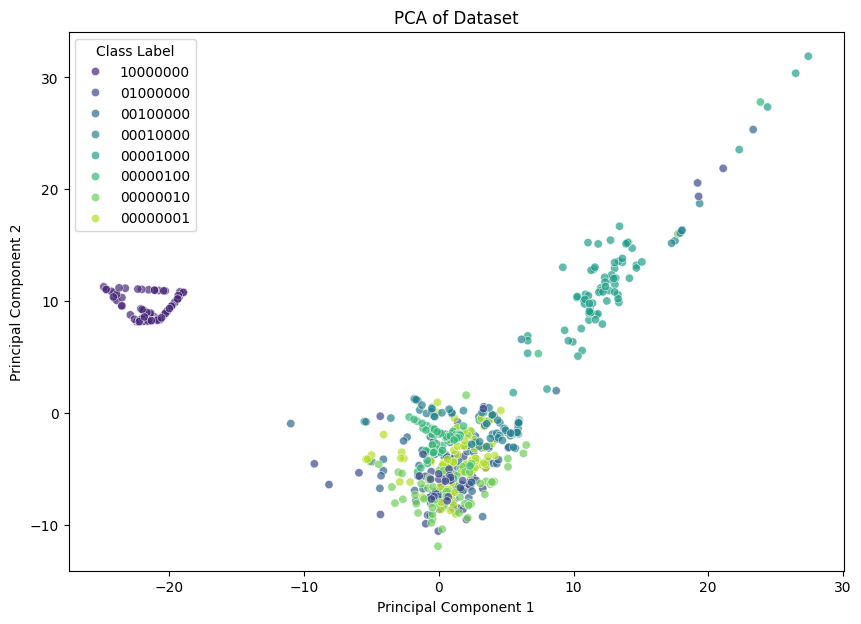

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming merged_df_encoded_t is already created

# Check for null values and replace them with the median
if merged_df_encoded_t.isnull().values.any():
    merged_df_encoded_t = merged_df_encoded_t.fillna(merged_df_encoded_t.median())

# Separate features (X) and target variable (y)
X = merged_df_encoded_t.iloc[:, :-1]  # Features are all columns except the last one (class_label)
y = merged_df_encoded_t['class_label']  # Target variable is the class label

# Apply SMOTE to balance the classes
smote = SMOTE(k_neighbors=3, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Feature selection using Chi-squared
num_features_to_select = 400  # Number of important features to select
chi2_selector = SelectKBest(chi2, k=num_features_to_select)
X_chi2_selected = chi2_selector.fit_transform(X_resampled, y_resampled)

# Get the indices of selected features
selected_feature_indices = chi2_selector.get_support(indices=True)

# Get the names of selected features
selected_feature_names = X.columns[selected_feature_indices]

# Create a DataFrame with only the selected features
selected_features_df = pd.DataFrame(X_chi2_selected, columns=selected_feature_names)
selected_features_df['class_label'] = y_resampled

# Standardization
scaler = StandardScaler()
X_standardized = scaler.fit_transform(selected_features_df.drop(columns=['class_label']))

# PCA
num_components = 2  # Number of principal components to keep
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_standardized)

# Combine PCA-transformed features with the class label
pca_features_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(num_components)])
pca_features_df['class_label'] = selected_features_df['class_label'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    pca_features_df.drop(columns=['class_label']),
    pca_features_df['class_label'],
    test_size=0.2,
    random_state=42
)

# Initialize the classifier
classifier = RandomForestClassifier(random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}")

# Optionally, you can print the classification report for more detailed performance metrics
print(classification_report(y_test, y_pred))

# Print the shape of the train and test sets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Plotting PCA results
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='class_label', data=pca_features_df, palette='viridis', alpha=0.7)
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class Label')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier  # Importing LightGBM
from sklearn.metrics import accuracy_score

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(selected_features_df.drop(columns=['class_label']),
                                                    selected_features_df['class_label'],
                                                    test_size=0.2, random_state=42)

# 3. Model Selection
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Classifier": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Extra Trees Classifier": ExtraTreesClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)  # Using LightGBM Classifier
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# 4. Evaluation
for name, accuracy in results.items():
    print(f"{name}: Accuracy = {accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 63200
[LightGBM] [Info] Number of data points in the train set: 473, number of used features: 400
[LightGBM] [Info] Start training from score -2.151762
[LightGBM] [Info] Start training from score -2.048222
[LightGBM] [Info] Start training from score -2.064751
[LightGBM] [Info] Start training from score -2.081558
[LightGBM] [Info] Start training from score -2.015961
[LightGBM] [Info] Start training from score -2.151762
[LightGBM] [Info] Start training from score -2.000212
[LightGBM] [Info] Start training from score -2.133744
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

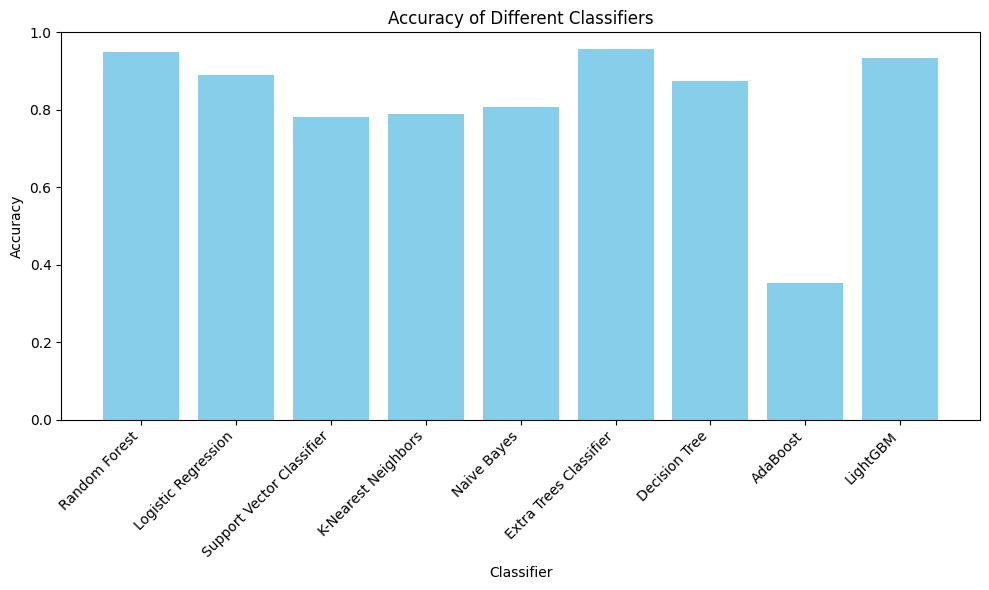

In [ ]:
import matplotlib.pyplot as plt

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Initialize base classifiers
rf_classifier = RandomForestClassifier(random_state=42)
lr_classifier = LogisticRegression(random_state=42)
svm_classifier = SVC(random_state=42)
knn_classifier = KNeighborsClassifier()
nb_classifier = GaussianNB()
dt_classifier = DecisionTreeClassifier(random_state=42)
ada_classifier = AdaBoostClassifier(random_state=42)

# Create a voting classifier with the base classifiers
voting_classifier = VotingClassifier(estimators=[
    ('rf', rf_classifier),
    ('lr', lr_classifier),
    ('svm', svm_classifier),
    ('knn', knn_classifier),
    ('nb', nb_classifier),
    ('dt', dt_classifier),
    ('ada', ada_classifier)
], voting='hard')  # 'hard' voting combines predictions by majority voting

# Train the voting classifier
voting_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = voting_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Ensemble Voting Classifier Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensemble Voting Classifier Accuracy: 0.8823529411764706


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Initialize base classifiers
rf_classifier = RandomForestClassifier(random_state=42)
lr_classifier = LogisticRegression(random_state=42)
svm_classifier = SVC(random_state=42)
knn_classifier = KNeighborsClassifier()
nb_classifier = GaussianNB()
dt_classifier = DecisionTreeClassifier(random_state=42)
ada_classifier = AdaBoostClassifier(random_state=42)

# Create a voting classifier with the base classifiers
voting_classifier = VotingClassifier(estimators=[
    ('rf', rf_classifier),
    ('lr', lr_classifier),
    ('svm', svm_classifier),
    ('knn', knn_classifier),
    ('nb', nb_classifier),
    ('dt', dt_classifier),
    ('ada', ada_classifier)
], voting='hard')  # 'hard' voting combines predictions by majority voting

# Train the voting classifier
voting_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = voting_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Ensemble Voting Classifier Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensemble Voting Classifier Accuracy: 0.8823529411764706
